In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# 1. Load data

In [598]:
reg_mq_names = ["mq_1_Sleeplatency", "mq_2_times_awake", "mq_3_time_lay_awake"]
clf_mq_names = [
    "mq_4_calm_sleep",
    "mq_5_superficial_sleep",
    "mq_6_recovery",
    "mq_7_bad_mood",
    "mq_8_energy",
    "mq_9_tense",
    "mq_10_unconcentrated",
]

In [2]:
ss_clf_CV_scores_opti_cont_change_dur = pd.read_csv(
    "../data/opt_results/ss_clf_CV_scores_opti_cont_change_dur.csv", index_col=0
)
ss_clf_CV_scores_opti_frequency = pd.read_csv(
    "../data/opt_results/ss_clf_CV_scores_opti_frequency.csv", index_col=0
)
ss_clf_CV_scores_opti_resampled = pd.read_csv(
    "../data/opt_results/ss_clf_CV_scores_opti_resampled.csv", index_col=0
)
ss_reg_CV_scores_opti_cont_change_dur = pd.read_csv(
    "../data/opt_results/ss_reg_CV_scores_opti_cont_change_dur.csv", index_col=0
)
ss_reg_CV_scores_opti_frequency = pd.read_csv(
    "../data/opt_results/ss_reg_CV_scores_opti_frequency.csv", index_col=0
)
ss_reg_CV_scores_opti_resampled = pd.read_csv(
    "../data/opt_results/ss_reg_CV_scores_opti_resampled.csv", index_col=0
)

In [175]:
ss_clf_hyp_opti_cont_change_dur = pd.read_csv(
    "../data/opt_results/ss_clf_hyp_opti_cont_change_dur.csv", index_col="model"
)
ss_clf_hyp_opti_frequency = pd.read_csv(
    "../data/opt_results/ss_clf_hyp_opti_frequency.csv", index_col="model"
)
ss_clf_hyp_opti_resampled = pd.read_csv(
    "../data/opt_results/ss_clf_hyp_opti_resampled.csv", index_col="model"
)
ss_reg_hyp_opti_cont_change_dur = pd.read_csv(
    "../data/opt_results/ss_reg_hyp_opti_cont_change_dur.csv", index_col="model"
)
ss_reg_hyp_opti_frequency = pd.read_csv(
    "../data/opt_results/ss_reg_hyp_opti_frequency.csv", index_col="model"
)
ss_reg_hyp_opti_resampled = pd.read_csv(
    "../data/opt_results/ss_reg_hyp_opti_resampled.csv", index_col="model"
)

In [176]:
hp_ss = {
    "clf": {
        key: {
            clf_mq_name: val[f"hyp_{clf_mq_name}"].to_dict()
            for clf_mq_name in clf_mq_names
        }
        for key, val in zip(
            [
                "cont_change_dur",
                "frequency",
                "resampled",
            ],
            [
                ss_clf_hyp_opti_cont_change_dur,
                ss_clf_hyp_opti_frequency,
                ss_clf_hyp_opti_resampled,
            ],
        )
    },
    "reg": {
        key: {
            reg_mq_name: val[f"hyp_{reg_mq_name}"].to_dict()
            for reg_mq_name in reg_mq_names
        }
        for key, val in zip(
            [
                "cont_change_dur",
                "frequency",
                "resampled",
            ],
            [
                ss_reg_hyp_opti_cont_change_dur,
                ss_reg_hyp_opti_frequency,
                ss_reg_hyp_opti_resampled,
            ],
        )
    },
}

{'clf': {'cont_change_dur': {'mq_4_calm_sleep': {'LogisticRegression__penalty=None': "[OrderedDict({'model__C': 3.916449174261764})]",
    'LogisticRegression__penalty=l1': "[OrderedDict({'model__C': 0.5958198748137256})]",
    'LogisticRegression__penalty=l2': "[OrderedDict({'model__C': 0.5958198748137256})]",
    'LogisticRegression__penalty=elasticnet': "[OrderedDict({'model__C': 0.5958198748137256, 'model__l1_ratio': 0.9789036584263616})]",
    'KNeighborsClassifier': "[OrderedDict({'model__n_neighbors': 14})]",
    'DecisionTreeClassifier': "[OrderedDict({'model__max_depth': 6})]",
    'RandomForestClassifier': "[OrderedDict({'model__max_depth': 11, 'model__n_estimators': 219})]",
    'AdaBoostClassifier': "[OrderedDict({'model__learning_rate': 0.039164491742617644, 'model__n_estimators': 219})]",
    'SVC': "[OrderedDict({'model__C': 3.916449174261764, 'model__kernel': 'rbf'})]",
    'LinearSVC': "[OrderedDict({'model__C': 0.5958198748137256})]"},
   'mq_5_superficial_sleep': {'L

In [179]:
eeg_clf_optimised_CV_scores_clf_corr9_full = pd.read_csv(
    "../data/opt_results/optimised_CV_scores_clf_corr9_full.csv", index_col=0
)
eeg_clf_optimised_CV_scores_clf_nn = pd.concat(
    [
        pd.read_csv("../data/opt_results/optimised_CV_scores_clf_nn.csv", index_col=0),
        pd.read_csv(
            "../data/opt_results/optimised_CV_scores_clf_mq6_nn.csv", index_col=0
        ),
    ]
)

model  fold  test_score  train_score                  y_name
0   NeuralNetClassifier     0    0.465126     0.766125           mq_7_bad_mood
1   NeuralNetClassifier     1    0.423576     0.716634           mq_7_bad_mood
2   NeuralNetClassifier     2    0.278095     0.695141           mq_7_bad_mood
3   NeuralNetClassifier     3    0.424107     0.692141           mq_7_bad_mood
4   NeuralNetClassifier     4    0.519148     0.633137           mq_7_bad_mood
0   NeuralNetClassifier     0    0.636281     0.828358         mq_4_calm_sleep
1   NeuralNetClassifier     1    0.228734     0.839388         mq_4_calm_sleep
2   NeuralNetClassifier     2    0.196923     0.822569         mq_4_calm_sleep
3   NeuralNetClassifier     3    0.325079     0.854055         mq_4_calm_sleep
4   NeuralNetClassifier     4    0.519048     0.817842         mq_4_calm_sleep
5   NeuralNetClassifier     0    0.384508     0.839715  mq_5_superficial_sleep
6   NeuralNetClassifier     1    0.372449     0.828070  mq_5_superficial_sleep
7   NeuralNetClassifier     2    0.500000     0.841796  mq_5_superficial_sleep
8   NeuralNetClassifier     3    0.299825     0.841950  mq_5_superficial_sleep
9   NeuralNetClassifier     4    0.196429     0.843128  mq_5_superficial_sleep
10  NeuralNetClassifier     0    0.434343     0.839921           mq_6_recovery
11  NeuralNetClassifier     1    0.250000     0.839201           mq_6_recovery
12  NeuralNetClassifier     2    0.242370     0.842274           mq_6_recovery
13  NeuralNetClassifier     3    0.345202     0.828706           mq_6_recovery
14  NeuralNetClassifier     4    0.307792     0.794533           mq_6_recovery
15  NeuralNetClassifier     0    0.241342     0.802806             mq_8_energy
16  NeuralNetClassifier     1    0.360251     0.768645             mq_8_energy
17  NeuralNetClassifier     2    0.417857     0.708140             mq_8_energy
18  NeuralNetClassifier     3    0.231469     0.617736             mq_8_energy
19  NeuralNetClassifier     4    0.324242     0.656853             mq_8_energy
20  NeuralNetClassifier     0    0.337662     0.841747              mq_9_tense
21  NeuralNetClassifier     1    0.293651     0.852819              mq_9_tense
22  NeuralNetClassifier     2    0.542929     0.782947              mq_9_tense
23  NeuralNetClassifier     3    0.367100     0.854075              mq_9_tense
24  NeuralNetClassifier     4    0.277647     0.737859              mq_9_tense
25  NeuralNetClassifier     0    0.423624     0.830496    mq_10_unconcentrated
26  NeuralNetClassifier     1    0.404762     0.865252    mq_10_unconcentrated
27  NeuralNetClassifier     2    0.407197     0.889863    mq_10_unconcentrated
28  NeuralNetClassifier     3    0.449206     0.828553    mq_10_unconcentrated
29  NeuralNetClassifier     4    0.326667     0.841844    mq_10_unconcentrated

In [180]:
with open("../data/opt_results/best_params_clf_corr9_full.pkl", "rb") as f:
    eeg_clf_best_params_clf_corr9_full = pickle.load(f)

with open("../data/opt_results/opt_utim_fft.pkl", "rb") as f:
    eeg_clf_opt_utim_fft = pickle.load(f)

with open("../data/opt_results/best_params_clf_nn.pkl", "rb") as f:
    eeg_clf_best_params_clf_nn = pickle.load(f)

{'mq_4_calm_sleep': [OrderedDict([('model__C', 3.916449174261764)]),
  OrderedDict([('model__C', 79.6881371691501)]),
  OrderedDict([('model__C', 0.5958198748137256)]),
  OrderedDict([('model__C', 0.6943132838416054),
               ('model__l1_ratio', 0.5353106333247523)]),
  OrderedDict([('model__max_depth', 2)]),
  OrderedDict([('model__max_depth', 4), ('model__n_estimators', 150)]),
  OrderedDict([('model__learning_rate', 0.04628272458390895),
               ('model__n_estimators', 280)]),
  OrderedDict([('model__C', 11.69785455903441), ('model__kernel', 'poly')]),
  OrderedDict([('model__C', 0.10007659108992124)])],
 'mq_5_superficial_sleep': [OrderedDict([('model__C', 3.916449174261764)]),
  OrderedDict([('model__C', 0.5958198748137256)]),
  OrderedDict([('model__C', 0.5958198748137256)]),
  OrderedDict([('model__C', 3.3999077954387857),
               ('model__l1_ratio', 0.5269790313150186)]),
  OrderedDict([('model__max_depth', 8)]),
  OrderedDict([('model__max_depth', 4), ('mo

In [254]:
with open("../data/opt_results/reg_optimised_CV_scores_across_mqs.pkl", "rb") as f:
    reg_optimised_CV_scores_across_mqs = pickle.load(f)
eeg_reg_optimised_CV_scores_across_mqs = reg_optimised_CV_scores_across_mqs[
    "optimised_CV_scores_across_mqs"
]
eeg_reg_optimised_CV_scores_across_mqs["test_score"] *= -1
eeg_reg_optimised_CV_scores_across_mqs["train_score"] *= -1
eeg_reg_best_params_across_mqs_and_models = reg_optimised_CV_scores_across_mqs[
    "best_params_across_mqs_and_models"
]

model fold test_score train_score               y_name
0    LinearRegression    0   20.73899         0.0    mq_1_Sleeplatency
1    LinearRegression    1  23.812603         0.0    mq_1_Sleeplatency
2    LinearRegression    2  23.617177         0.0    mq_1_Sleeplatency
3    LinearRegression    3  25.226034         0.0    mq_1_Sleeplatency
4    LinearRegression    4  22.153618         0.0    mq_1_Sleeplatency
..                ...  ...        ...         ...                  ...
130         LinearSVR    0  24.790285    27.66361  mq_3_time_lay_awake
131         LinearSVR    1  29.495811   24.727836  mq_3_time_lay_awake
132         LinearSVR    2  35.577168   27.518165  mq_3_time_lay_awake
133         LinearSVR    3  51.130131   17.276995  mq_3_time_lay_awake
134         LinearSVR    4  28.736121   26.990345  mq_3_time_lay_awake

[135 rows x 5 columns]

# 2. Concatenate data

## 2.1. Concatenate classification with sleep cycle data

In [182]:
ss_clf_CV_scores = pd.DataFrame()

for df, parameters in zip(
    [
        ss_clf_CV_scores_opti_cont_change_dur,
        ss_clf_CV_scores_opti_frequency,
        ss_clf_CV_scores_opti_resampled,
        # ss_reg_CV_scores_opti_cont_change_dur,
        # ss_reg_CV_scores_opti_frequency,
        # ss_reg_CV_scores_opti_resampled,
    ],
    ["cont_change_dur", "frequency", "resampled"],
):
    df_copy = df.copy(deep=True)
    df_copy["parameters"] = parameters
    ss_clf_CV_scores = pd.concat([ss_clf_CV_scores, df_copy], axis=0)
ss_clf_CV_scores

model  fold  test_score  train_score  \
0    LogisticRegression__penalty=None     0    0.271368     0.785174   
1    LogisticRegression__penalty=None     1    0.046823     1.000000   
2    LogisticRegression__penalty=None     2    0.246259     1.000000   
3    LogisticRegression__penalty=None     3    0.299901     0.879993   
4    LogisticRegression__penalty=None     4    0.303456     0.881910   
..                                ...   ...         ...          ...   
345                         LinearSVC     0    0.291667     1.000000   
346                         LinearSVC     1    0.290382     1.000000   
347                         LinearSVC     2    0.256187     1.000000   
348                         LinearSVC     3    0.354555     1.000000   
349                         LinearSVC     4    0.101449     1.000000   

                   y_name       parameters  
0         mq_4_calm_sleep  cont_change_dur  
1         mq_4_calm_sleep  cont_change_dur  
2         mq_4_calm_sleep  cont_change_dur  
3         mq_4_calm_sleep  cont_change_dur  
4         mq_4_calm_sleep  cont_change_dur  
..                    ...              ...  
345  mq_10_unconcentrated        resampled  
346  mq_10_unconcentrated        resampled  
347  mq_10_unconcentrated        resampled  
348  mq_10_unconcentrated        resampled  
349  mq_10_unconcentrated        resampled  

[1050 rows x 6 columns]

## 2.2. Concatenate regression with sleep cycle data

In [183]:
ss_reg_CV_scores = pd.DataFrame()
for df, parameters in zip(
    [
        ss_reg_CV_scores_opti_cont_change_dur,
        ss_reg_CV_scores_opti_frequency,
        ss_reg_CV_scores_opti_resampled,
        # ss_reg_CV_scores_opti_cont_change_dur,
        # ss_reg_CV_scores_opti_frequency,
        # ss_reg_CV_scores_opti_resampled,
    ],
    ["cont_change_dur", "frequency", "resampled"],
):
    df_copy = df.copy(deep=True)
    df_copy["parameters"] = parameters
    ss_reg_CV_scores = pd.concat([ss_reg_CV_scores, df_copy], axis=0)
ss_reg_CV_scores

model  fold  test_score  train_score               y_name  \
0    LinearRegression     0   65.749817     6.166832    mq_1_Sleeplatency   
1    LinearRegression     1  147.506600    10.678024    mq_1_Sleeplatency   
2    LinearRegression     2   15.242526    10.323108    mq_1_Sleeplatency   
3    LinearRegression     3   15.130512    10.184535    mq_1_Sleeplatency   
4    LinearRegression     4   12.481658    10.339646    mq_1_Sleeplatency   
..                ...   ...         ...          ...                  ...   
130         LinearSVR     0   49.886894     0.002401  mq_3_time_lay_awake   
131         LinearSVR     1   32.040130     1.258619  mq_3_time_lay_awake   
132         LinearSVR     2   35.138922     0.003193  mq_3_time_lay_awake   
133         LinearSVR     3   31.644334     1.455786  mq_3_time_lay_awake   
134         LinearSVR     4   41.367862     0.003482  mq_3_time_lay_awake   

          parameters  
0    cont_change_dur  
1    cont_change_dur  
2    cont_change_dur  
3    cont_change_dur  
4    cont_change_dur  
..               ...  
130        resampled  
131        resampled  
132        resampled  
133        resampled  
134        resampled  

[405 rows x 6 columns]

## 2.3. Concatenate NN data with EEG CLF

In [184]:
eeg_clf_optimised_CV_scores = pd.concat(
    [eeg_clf_optimised_CV_scores_clf_corr9_full, eeg_clf_optimised_CV_scores_clf_nn]
)
eeg_clf_optimised_CV_scores

model  fold  test_score  train_score  \
0   LogisticRegression__penalty=None     0    0.372149     1.000000   
1   LogisticRegression__penalty=None     1    0.275819     1.000000   
2   LogisticRegression__penalty=None     2    0.313636     1.000000   
3   LogisticRegression__penalty=None     3    0.297186     1.000000   
4   LogisticRegression__penalty=None     4    0.319231     1.000000   
..                               ...   ...         ...          ...   
25               NeuralNetClassifier     0    0.423624     0.830496   
26               NeuralNetClassifier     1    0.404762     0.865252   
27               NeuralNetClassifier     2    0.407197     0.889863   
28               NeuralNetClassifier     3    0.449206     0.828553   
29               NeuralNetClassifier     4    0.326667     0.841844   

                  y_name  
0        mq_4_calm_sleep  
1        mq_4_calm_sleep  
2        mq_4_calm_sleep  
3        mq_4_calm_sleep  
4        mq_4_calm_sleep  
..                   ...  
25  mq_10_unconcentrated  
26  mq_10_unconcentrated  
27  mq_10_unconcentrated  
28  mq_10_unconcentrated  
29  mq_10_unconcentrated  

[350 rows x 5 columns]

## 2.4. Concat all CLF data together

In [185]:
eeg_clf_CV_scores = eeg_clf_optimised_CV_scores.copy(deep=True)
eeg_clf_CV_scores["parameters"] = "eeg_feats"
clf_CV_scores = pd.concat([eeg_clf_CV_scores, ss_clf_CV_scores])
clf_CV_scores

model  fold  test_score  train_score  \
0    LogisticRegression__penalty=None     0    0.372149          1.0   
1    LogisticRegression__penalty=None     1    0.275819          1.0   
2    LogisticRegression__penalty=None     2    0.313636          1.0   
3    LogisticRegression__penalty=None     3    0.297186          1.0   
4    LogisticRegression__penalty=None     4    0.319231          1.0   
..                                ...   ...         ...          ...   
345                         LinearSVC     0    0.291667          1.0   
346                         LinearSVC     1    0.290382          1.0   
347                         LinearSVC     2    0.256187          1.0   
348                         LinearSVC     3    0.354555          1.0   
349                         LinearSVC     4    0.101449          1.0   

                   y_name parameters  
0         mq_4_calm_sleep  eeg_feats  
1         mq_4_calm_sleep  eeg_feats  
2         mq_4_calm_sleep  eeg_feats  
3         mq_4_calm_sleep  eeg_feats  
4         mq_4_calm_sleep  eeg_feats  
..                    ...        ...  
345  mq_10_unconcentrated  resampled  
346  mq_10_unconcentrated  resampled  
347  mq_10_unconcentrated  resampled  
348  mq_10_unconcentrated  resampled  
349  mq_10_unconcentrated  resampled  

[1400 rows x 6 columns]

## 2.5 Concat all REG data

In [260]:
eeg_reg_optimised_CV_scores_across_mqs_ = eeg_reg_optimised_CV_scores_across_mqs.copy(
    deep=True
)
eeg_reg_optimised_CV_scores_across_mqs_["parameters"] = "eeg_feats"
reg_CV_scores = pd.concat([ss_reg_CV_scores, eeg_reg_optimised_CV_scores_across_mqs_])
reg_CV_scores

model fold test_score train_score               y_name  \
0    LinearRegression    0  65.749817    6.166832    mq_1_Sleeplatency   
1    LinearRegression    1   147.5066   10.678024    mq_1_Sleeplatency   
2    LinearRegression    2  15.242526   10.323108    mq_1_Sleeplatency   
3    LinearRegression    3  15.130512   10.184535    mq_1_Sleeplatency   
4    LinearRegression    4  12.481658   10.339646    mq_1_Sleeplatency   
..                ...  ...        ...         ...                  ...   
130         LinearSVR    0  24.790285    27.66361  mq_3_time_lay_awake   
131         LinearSVR    1  29.495811   24.727836  mq_3_time_lay_awake   
132         LinearSVR    2  35.577168   27.518165  mq_3_time_lay_awake   
133         LinearSVR    3  51.130131   17.276995  mq_3_time_lay_awake   
134         LinearSVR    4  28.736121   26.990345  mq_3_time_lay_awake   

          parameters  
0    cont_change_dur  
1    cont_change_dur  
2    cont_change_dur  
3    cont_change_dur  
4    cont_change_dur  
..               ...  
130        eeg_feats  
131        eeg_feats  
132        eeg_feats  
133        eeg_feats  
134        eeg_feats  

[540 rows x 6 columns]

## 2.7 Calculate STD

In [531]:
# std_reg_CV_scores = reg_CV_scores.copy(deep=True)
# std_reg_CV_scores["model, parameters, mq"] = std_reg_CV_scores["model"] + ', ' + std_reg_CV_scores["parameters"] + ', ' + std_reg_CV_scores["y_name"]
# std_reg_CV_scores.drop(["model", "parameters", "y_name"], inplace=True, axis=1)
# print(std_reg_CV_scores.groupby("model, parameters, mq").std().drop("fold", axis=1).to_markdown())

| model, parameters, mq                                       |   test_score |   train_score |
|:------------------------------------------------------------|-------------:|--------------:|
| AdaBoostRegressor, cont_change_dur, mq_1_Sleeplatency       |     4.10823  |   0.558253    |
| AdaBoostRegressor, cont_change_dur, mq_2_times_awake        |     0.699803 |   0.0424865   |
| AdaBoostRegressor, cont_change_dur, mq_3_time_lay_awake     |     6.26199  |   0.986345    |
| AdaBoostRegressor, eeg_feats, mq_1_Sleeplatency             |     4.79785  |   0.268648    |
| AdaBoostRegressor, eeg_feats, mq_2_times_awake              |     0.712768 |   0.0538158   |
| AdaBoostRegressor, eeg_feats, mq_3_time_lay_awake           |    14.9399   |   0.879119    |
| AdaBoostRegressor, frequency, mq_1_Sleeplatency             |     6.12232  |   0.671414    |
| AdaBoostRegressor, frequency, mq_2_times_awake              |     0.753795 |   0.0184403   |
| AdaBoostRegressor, frequency, mq_3_time_lay_awake           |    10.8409   |   0.767819    |
| AdaBoostRegressor, resampled, mq_1_Sleeplatency             |     5.79873  |   0.773616    |
| AdaBoostRegressor, resampled, mq_2_times_awake              |     0.588478 |   0.0579776   |
| AdaBoostRegressor, resampled, mq_3_time_lay_awake           |     9.4541   |   1.11807     |
| DecisionTreeRegressor, cont_change_dur, mq_1_Sleeplatency   |     5.53413  |   0.793369    |
| DecisionTreeRegressor, cont_change_dur, mq_2_times_awake    |     0.939781 |   0           |
| DecisionTreeRegressor, cont_change_dur, mq_3_time_lay_awake |    15.1685   |   1.00032     |
| DecisionTreeRegressor, eeg_feats, mq_1_Sleeplatency         |     8.80399  |   1.18542     |
| DecisionTreeRegressor, eeg_feats, mq_2_times_awake          |     0.57589  |   0.119934    |
| DecisionTreeRegressor, eeg_feats, mq_3_time_lay_awake       |    15.3166   |   1.27812     |
| DecisionTreeRegressor, frequency, mq_1_Sleeplatency         |     5.47066  |   1.06867     |
| DecisionTreeRegressor, frequency, mq_2_times_awake          |     0.946936 |   0           |
| DecisionTreeRegressor, frequency, mq_3_time_lay_awake       |    12.0899   |   0.35366     |
| DecisionTreeRegressor, resampled, mq_1_Sleeplatency         |     2.677    |   0.657608    |
| DecisionTreeRegressor, resampled, mq_2_times_awake          |     0.890905 |   0.177943    |
| DecisionTreeRegressor, resampled, mq_3_time_lay_awake       |    13.0492   |   0.638706    |
| ElasticNet, cont_change_dur, mq_1_Sleeplatency              |    14.5675   |   1.93668     |
| ElasticNet, cont_change_dur, mq_2_times_awake               |     4.86575  |   0.174512    |
| ElasticNet, cont_change_dur, mq_3_time_lay_awake            |    21.1657   |   2.11974     |
| ElasticNet, eeg_feats, mq_1_Sleeplatency                    |     5.31437  |   0.796803    |
| ElasticNet, eeg_feats, mq_2_times_awake                     |     0.70305  |   0.193797    |
| ElasticNet, eeg_feats, mq_3_time_lay_awake                  |    13.1231   |   1.66407     |
| ElasticNet, frequency, mq_1_Sleeplatency                    |     3.50811  |   0.000581304 |
| ElasticNet, frequency, mq_2_times_awake                     |     0.281561 |   0.00010824  |
| ElasticNet, frequency, mq_3_time_lay_awake                  |     5.75715  |   0.000404811 |
| ElasticNet, resampled, mq_1_Sleeplatency                    |     3.87399  |   0.000939662 |
| ElasticNet, resampled, mq_2_times_awake                     |     0.90233  |   0.000102712 |
| ElasticNet, resampled, mq_3_time_lay_awake                  |    10.8278   |   0.000428989 |
| Lasso, cont_change_dur, mq_1_Sleeplatency                   |    14.5675   |   1.93668     |
| Lasso, cont_change_dur, mq_2_times_awake                    |     4.86575  |   0.174512    |
| Lasso, cont_change_dur, mq_3_time_lay_awake                 |    21.1657   |   2.11974     |
| Lasso, eeg_feats, mq_1_Sleeplatency                         |     5.70828  |   0.76839     |
| Lasso, eeg_feats, mq_2_times_awake                          |     0.70305  |   0.193797    |
| Lasso, eeg_feats, mq_3_time_lay_awake                       |    13.2495   |   1.46522     |
| Lasso, frequency, mq_1_Sleeplatency                         |     3.50811  |   0.000581306 |
| Lasso, frequency, mq_2_times_awake                          |     0.281561 |   0.000108243 |
| Lasso, frequency, mq_3_time_lay_awake                       |     5.75715  |   0.000404813 |
| Lasso, resampled, mq_1_Sleeplatency                         |     3.87399  |   0.000939664 |
| Lasso, resampled, mq_2_times_awake                          |     0.90233  |   0.000102712 |
| Lasso, resampled, mq_3_time_lay_awake                       |    10.8278   |   0.00042899  |
| LinearRegression, cont_change_dur, mq_1_Sleeplatency        |    58.266    |   1.89351     |
| LinearRegression, cont_change_dur, mq_2_times_awake         |    14.988    |   0.187379    |
| LinearRegression, cont_change_dur, mq_3_time_lay_awake      |   145.346    |   2.08066     |
| LinearRegression, eeg_feats, mq_1_Sleeplatency              |     1.715    |   3.79127e-14 |
| LinearRegression, eeg_feats, mq_2_times_awake               |     0.63818  |   2.14942e-15 |
| LinearRegression, eeg_feats, mq_3_time_lay_awake            |     7.9212   |   2.26826e-14 |
| LinearRegression, frequency, mq_1_Sleeplatency              |     4.5578   |   2.98207e-15 |
| LinearRegression, frequency, mq_2_times_awake               |     0.507229 |   8.60475e-16 |
| LinearRegression, frequency, mq_3_time_lay_awake            |     6.89348  |   1.90363e-14 |
| LinearRegression, resampled, mq_1_Sleeplatency              |     6.13163  |   5.46828e-15 |
| LinearRegression, resampled, mq_2_times_awake               |     0.703211 |   5.04287e-16 |
| LinearRegression, resampled, mq_3_time_lay_awake            |     7.67442  |   1.81554e-14 |
| LinearSVR, cont_change_dur, mq_1_Sleeplatency               |    10.3618   |   2.02346     |
| LinearSVR, cont_change_dur, mq_2_times_awake                |     2.50785  |   0.214379    |
| LinearSVR, cont_change_dur, mq_3_time_lay_awake             |    11.3183   |   2.96264     |
| LinearSVR, eeg_feats, mq_1_Sleeplatency                     |     4.84982  |   1.85429     |
| LinearSVR, eeg_feats, mq_2_times_awake                      |     0.561085 |   0.00249216  |
| LinearSVR, eeg_feats, mq_3_time_lay_awake                   |    10.3529   |   4.38694     |
| LinearSVR, frequency, mq_1_Sleeplatency                     |     4.37744  |   0.000424854 |
| LinearSVR, frequency, mq_2_times_awake                      |     0.529716 |   6.7401e-05  |
| LinearSVR, frequency, mq_3_time_lay_awake                   |     7.12773  |   2.14745     |
| LinearSVR, resampled, mq_1_Sleeplatency                     |     5.17247  |   0.000224733 |
| LinearSVR, resampled, mq_2_times_awake                      |     0.687424 |   3.42514e-05 |
| LinearSVR, resampled, mq_3_time_lay_awake                   |     7.69318  |   0.744982    |
| RandomForestRegressor, cont_change_dur, mq_1_Sleeplatency   |     4.53082  |   0.684615    |
| RandomForestRegressor, cont_change_dur, mq_2_times_awake    |     0.608214 |   0.0717508   |
| RandomForestRegressor, cont_change_dur, mq_3_time_lay_awake |    10.9585   |   1.26534     |
| RandomForestRegressor, eeg_feats, mq_1_Sleeplatency         |     4.83315  |   0.470876    |
| RandomForestRegressor, eeg_feats, mq_2_times_awake          |     0.627889 |   0.0667417   |
| RandomForestRegressor, eeg_feats, mq_3_time_lay_awake       |    15.0308   |   1.59125     |
| RandomForestRegressor, frequency, mq_1_Sleeplatency         |     5.15814  |   0.681014    |
| RandomForestRegressor, frequency, mq_2_times_awake          |     0.637643 |   0.0534649   |
| RandomForestRegressor, frequency, mq_3_time_lay_awake       |     7.34036  |   1.27298     |
| RandomForestRegressor, resampled, mq_1_Sleeplatency         |     5.53344  |   0.803739    |
| RandomForestRegressor, resampled, mq_2_times_awake          |     0.562315 |   0.0618711   |
| RandomForestRegressor, resampled, mq_3_time_lay_awake       |    11.0315   |   1.68535     |
| Ridge, cont_change_dur, mq_1_Sleeplatency                   |    58.2662   |   1.89351     |
| Ridge, cont_change_dur, mq_2_times_awake                    |    14.9937   |   0.187379    |
| Ridge, cont_change_dur, mq_3_time_lay_awake                 |   145.403    |   2.08066     |
| Ridge, eeg_feats, mq_1_Sleeplatency                         |     3.24108  |   0.450918    |
| Ridge, eeg_feats, mq_2_times_awake                          |     0.805496 |   0.041717    |
| Ridge, eeg_feats, mq_3_time_lay_awake                       |     9.14977  |   1.03651     |
| Ridge, frequency, mq_1_Sleeplatency                         |     4.56568  |   1.43838e-14 |
| Ridge, frequency, mq_2_times_awake                          |     0.506514 |   9.12904e-16 |
| Ridge, frequency, mq_3_time_lay_awake                       |     6.89626  |   1.93227e-14 |
| Ridge, resampled, mq_1_Sleeplatency                         |     6.13466  |   1.86811e-14 |
| Ridge, resampled, mq_2_times_awake                          |     0.703459 |   8.8188e-16  |
| Ridge, resampled, mq_3_time_lay_awake                       |     7.67246  |   3.45114e-14 |
| SVR, cont_change_dur, mq_1_Sleeplatency                     |     6.31104  |   1.59112     |
| SVR, cont_change_dur, mq_2_times_awake                      |     0.745571 |   0.172594    |
| SVR, cont_change_dur, mq_3_time_lay_awake                   |    13.5744   |   3.89152     |
| SVR, eeg_feats, mq_1_Sleeplatency                           |     5.34919  |   1.81048     |
| SVR, eeg_feats, mq_2_times_awake                            |     0.676269 |   0.218826    |
| SVR, eeg_feats, mq_3_time_lay_awake                         |    13.7352   |   4.71346     |
| SVR, frequency, mq_1_Sleeplatency                           |     6.47968  |   1.60319     |
| SVR, frequency, mq_2_times_awake                            |     0.759147 |   0.195897    |
| SVR, frequency, mq_3_time_lay_awake                         |    13.6587   |   3.90087     |
| SVR, resampled, mq_1_Sleeplatency                           |     6.124    |   0.000485242 |
| SVR, resampled, mq_2_times_awake                            |     0.720055 |   0.00116399  |
| SVR, resampled, mq_3_time_lay_awake                         |    12.5014   |   8.6896e-05  |


In [530]:
# std_clf_CV_scores = clf_CV_scores.copy(deep=True)
# std_clf_CV_scores["model, parameters, mq"] = std_clf_CV_scores["model"] + ', ' + std_clf_CV_scores["parameters"] + ', ' + std_clf_CV_scores["y_name"]
# std_clf_CV_scores.drop(["model", "parameters", "y_name"], inplace=True, axis=1)
# print(std_clf_CV_scores.groupby("model, parameters, mq").std().drop("fold", axis=1).to_markdown())

| model, parameters, mq                                                           |   test_score |   train_score |
|:--------------------------------------------------------------------------------|-------------:|--------------:|
| AdaBoostClassifier, cont_change_dur, mq_10_unconcentrated                       |    0.0938519 |    0.0708811  |
| AdaBoostClassifier, cont_change_dur, mq_4_calm_sleep                            |    0.131589  |    0.0306032  |
| AdaBoostClassifier, cont_change_dur, mq_5_superficial_sleep                     |    0.067378  |    0.0444834  |
| AdaBoostClassifier, cont_change_dur, mq_6_recovery                              |    0.0729037 |    0.0329756  |
| AdaBoostClassifier, cont_change_dur, mq_7_bad_mood                              |    0.0719739 |    0.0546959  |
| AdaBoostClassifier, cont_change_dur, mq_8_energy                                |    0.0498346 |    0.0569052  |
| AdaBoostClassifier, cont_change_dur, mq_9_tense                                 |    0.0508648 |    0.0435215  |
| AdaBoostClassifier, eeg_feats, mq_10_unconcentrated                             |    0.108983  |    0.0515956  |
| AdaBoostClassifier, eeg_feats, mq_4_calm_sleep                                  |    0.052664  |    0.0767004  |
| AdaBoostClassifier, eeg_feats, mq_5_superficial_sleep                           |    0.11989   |    0.0393754  |
| AdaBoostClassifier, eeg_feats, mq_6_recovery                                    |    0.115961  |    0.0329179  |
| AdaBoostClassifier, eeg_feats, mq_7_bad_mood                                    |    0.0621757 |    0.0657872  |
| AdaBoostClassifier, eeg_feats, mq_8_energy                                      |    0.0954165 |    0.0462003  |
| AdaBoostClassifier, eeg_feats, mq_9_tense                                       |    0.116119  |    0.0327014  |
| AdaBoostClassifier, frequency, mq_10_unconcentrated                             |    0.0664005 |    0.0355268  |
| AdaBoostClassifier, frequency, mq_4_calm_sleep                                  |    0.0531461 |    0.0394035  |
| AdaBoostClassifier, frequency, mq_5_superficial_sleep                           |    0.0548401 |    0.0615031  |
| AdaBoostClassifier, frequency, mq_6_recovery                                    |    0.143412  |    0.0301401  |
| AdaBoostClassifier, frequency, mq_7_bad_mood                                    |    0.109816  |    0.0405606  |
| AdaBoostClassifier, frequency, mq_8_energy                                      |    0.0416494 |    0.0436869  |
| AdaBoostClassifier, frequency, mq_9_tense                                       |    0.06394   |    0.0617023  |
| AdaBoostClassifier, resampled, mq_10_unconcentrated                             |    0.0798429 |    0.104964   |
| AdaBoostClassifier, resampled, mq_4_calm_sleep                                  |    0.0646058 |    0.0443153  |
| AdaBoostClassifier, resampled, mq_5_superficial_sleep                           |    0.0988232 |    0.0885205  |
| AdaBoostClassifier, resampled, mq_6_recovery                                    |    0.0620593 |    0.062397   |
| AdaBoostClassifier, resampled, mq_7_bad_mood                                    |    0.0290125 |    0.071412   |
| AdaBoostClassifier, resampled, mq_8_energy                                      |    0.108262  |    0.0319383  |
| AdaBoostClassifier, resampled, mq_9_tense                                       |    0.0828372 |    0.0524626  |
| DecisionTreeClassifier, cont_change_dur, mq_10_unconcentrated                   |    0.0692622 |    0          |
| DecisionTreeClassifier, cont_change_dur, mq_4_calm_sleep                        |    0.0756319 |    0.0615977  |
| DecisionTreeClassifier, cont_change_dur, mq_5_superficial_sleep                 |    0.0188362 |    0.00482025 |
| DecisionTreeClassifier, cont_change_dur, mq_6_recovery                          |    0.113448  |    0          |
| DecisionTreeClassifier, cont_change_dur, mq_7_bad_mood                          |    0.102093  |    0          |
| DecisionTreeClassifier, cont_change_dur, mq_8_energy                            |    0.0531236 |    0.0798655  |
| DecisionTreeClassifier, cont_change_dur, mq_9_tense                             |    0.110038  |    0.0329138  |
| DecisionTreeClassifier, eeg_feats, mq_10_unconcentrated                         |    0.0855941 |    0.033873   |
| DecisionTreeClassifier, eeg_feats, mq_4_calm_sleep                              |    0.0638561 |    0.0571831  |
| DecisionTreeClassifier, eeg_feats, mq_5_superficial_sleep                       |    0.0825829 |    0.0111633  |
| DecisionTreeClassifier, eeg_feats, mq_6_recovery                                |    0.116296  |    0.0264801  |
| DecisionTreeClassifier, eeg_feats, mq_7_bad_mood                                |    0.167804  |    0.0692705  |
| DecisionTreeClassifier, eeg_feats, mq_8_energy                                  |    0.0709133 |    0.105301   |
| DecisionTreeClassifier, eeg_feats, mq_9_tense                                   |    0.112633  |    0.076688   |
| DecisionTreeClassifier, frequency, mq_10_unconcentrated                         |    0.0673413 |    0          |
| DecisionTreeClassifier, frequency, mq_4_calm_sleep                              |    0.0925101 |    0          |
| DecisionTreeClassifier, frequency, mq_5_superficial_sleep                       |    0.123745  |    0          |
| DecisionTreeClassifier, frequency, mq_6_recovery                                |    0.110151  |    0.0199898  |
| DecisionTreeClassifier, frequency, mq_7_bad_mood                                |    0.0827424 |    0          |
| DecisionTreeClassifier, frequency, mq_8_energy                                  |    0.0915188 |    0          |
| DecisionTreeClassifier, frequency, mq_9_tense                                   |    0.106221  |    0.0349216  |
| DecisionTreeClassifier, resampled, mq_10_unconcentrated                         |    0.133226  |    0.0724051  |
| DecisionTreeClassifier, resampled, mq_4_calm_sleep                              |    0.0785218 |    0.0870487  |
| DecisionTreeClassifier, resampled, mq_5_superficial_sleep                       |    0.155635  |    0.0102137  |
| DecisionTreeClassifier, resampled, mq_6_recovery                                |    0.0308514 |    0          |
| DecisionTreeClassifier, resampled, mq_7_bad_mood                                |    0.125376  |    0.063415   |
| DecisionTreeClassifier, resampled, mq_8_energy                                  |    0.0531837 |    0          |
| DecisionTreeClassifier, resampled, mq_9_tense                                   |    0.123043  |    0.00486794 |
| KNeighborsClassifier, cont_change_dur, mq_10_unconcentrated                     |    0.0380955 |    0.0537315  |
| KNeighborsClassifier, cont_change_dur, mq_4_calm_sleep                          |    0.0845416 |    0.032012   |
| KNeighborsClassifier, cont_change_dur, mq_5_superficial_sleep                   |    0.083545  |    0.0354073  |
| KNeighborsClassifier, cont_change_dur, mq_6_recovery                            |    0.0736106 |    0.0252543  |
| KNeighborsClassifier, cont_change_dur, mq_7_bad_mood                            |    0.0655957 |    0.0298231  |
| KNeighborsClassifier, cont_change_dur, mq_8_energy                              |    0.0530241 |    0.0235828  |
| KNeighborsClassifier, cont_change_dur, mq_9_tense                               |    0.116243  |    0.0561608  |
| KNeighborsClassifier, frequency, mq_10_unconcentrated                           |    0.138911  |    0.0288547  |
| KNeighborsClassifier, frequency, mq_4_calm_sleep                                |    0.0550728 |    0.0547952  |
| KNeighborsClassifier, frequency, mq_5_superficial_sleep                         |    0.0373503 |    0.0450815  |
| KNeighborsClassifier, frequency, mq_6_recovery                                  |    0.134314  |    0.079138   |
| KNeighborsClassifier, frequency, mq_7_bad_mood                                  |    0.0806461 |    0.0337391  |
| KNeighborsClassifier, frequency, mq_8_energy                                    |    0.149002  |    0.0241416  |
| KNeighborsClassifier, frequency, mq_9_tense                                     |    0.0653219 |    0.0433836  |
| KNeighborsClassifier, resampled, mq_10_unconcentrated                           |    0.0504455 |    0.0251734  |
| KNeighborsClassifier, resampled, mq_4_calm_sleep                                |    0.0953157 |    0.0254538  |
| KNeighborsClassifier, resampled, mq_5_superficial_sleep                         |    0.155314  |    0.0294302  |
| KNeighborsClassifier, resampled, mq_6_recovery                                  |    0.0841595 |    0.0333256  |
| KNeighborsClassifier, resampled, mq_7_bad_mood                                  |    0.0211683 |    0.0398541  |
| KNeighborsClassifier, resampled, mq_8_energy                                    |    0.135925  |    0.0568709  |
| KNeighborsClassifier, resampled, mq_9_tense                                     |    0.110169  |    0.0575393  |
| LinearSVC, cont_change_dur, mq_10_unconcentrated                                |    0.100004  |    0.021183   |
| LinearSVC, cont_change_dur, mq_4_calm_sleep                                     |    0.105481  |    0.0474519  |
| LinearSVC, cont_change_dur, mq_5_superficial_sleep                              |    0.0612951 |    0.0160516  |
| LinearSVC, cont_change_dur, mq_6_recovery                                       |    0.127292  |    0.036337   |
| LinearSVC, cont_change_dur, mq_7_bad_mood                                       |    0.0628538 |    0.0181991  |
| LinearSVC, cont_change_dur, mq_8_energy                                         |    0.073944  |    0.0699455  |
| LinearSVC, cont_change_dur, mq_9_tense                                          |    0.0646771 |    0.0501409  |
| LinearSVC, eeg_feats, mq_10_unconcentrated                                      |    0.0902437 |    0          |
| LinearSVC, eeg_feats, mq_4_calm_sleep                                           |    0.0646326 |    0          |
| LinearSVC, eeg_feats, mq_5_superficial_sleep                                    |    0.106402  |    0          |
| LinearSVC, eeg_feats, mq_6_recovery                                             |    0.0540196 |    0          |
| LinearSVC, eeg_feats, mq_7_bad_mood                                             |    0.16862   |    0          |
| LinearSVC, eeg_feats, mq_8_energy                                               |    0.0479915 |    0          |
| LinearSVC, eeg_feats, mq_9_tense                                                |    0.081283  |    0          |
| LinearSVC, frequency, mq_10_unconcentrated                                      |    0.0524452 |    0          |
| LinearSVC, frequency, mq_4_calm_sleep                                           |    0.0625305 |    0          |
| LinearSVC, frequency, mq_5_superficial_sleep                                    |    0.0712817 |    0          |
| LinearSVC, frequency, mq_6_recovery                                             |    0.0853504 |    0          |
| LinearSVC, frequency, mq_7_bad_mood                                             |    0.0788477 |    0          |
| LinearSVC, frequency, mq_8_energy                                               |    0.103497  |    0          |
| LinearSVC, frequency, mq_9_tense                                                |    0.0795733 |    0          |
| LinearSVC, resampled, mq_10_unconcentrated                                      |    0.0948851 |    0          |
| LinearSVC, resampled, mq_4_calm_sleep                                           |    0.101811  |    0          |
| LinearSVC, resampled, mq_5_superficial_sleep                                    |    0.0864262 |    0          |
| LinearSVC, resampled, mq_6_recovery                                             |    0.0527142 |    0          |
| LinearSVC, resampled, mq_7_bad_mood                                             |    0.0925539 |    0          |
| LinearSVC, resampled, mq_8_energy                                               |    0.0704927 |    0          |
| LinearSVC, resampled, mq_9_tense                                                |    0.0825191 |    0          |
| LogisticRegression__penalty=None, cont_change_dur, mq_10_unconcentrated         |    0.0804597 |    0.0770455  |
| LogisticRegression__penalty=None, cont_change_dur, mq_4_calm_sleep              |    0.106944  |    0.091473   |
| LogisticRegression__penalty=None, cont_change_dur, mq_5_superficial_sleep       |    0.0862215 |    0.043067   |
| LogisticRegression__penalty=None, cont_change_dur, mq_6_recovery                |    0.119775  |    0.0939654  |
| LogisticRegression__penalty=None, cont_change_dur, mq_7_bad_mood                |    0.0967829 |    0.0706783  |
| LogisticRegression__penalty=None, cont_change_dur, mq_8_energy                  |    0.0702527 |    0.107801   |
| LogisticRegression__penalty=None, cont_change_dur, mq_9_tense                   |    0.0434593 |    0.0731446  |
| LogisticRegression__penalty=None, eeg_feats, mq_10_unconcentrated               |    0.0772544 |    0          |
| LogisticRegression__penalty=None, eeg_feats, mq_4_calm_sleep                    |    0.0358343 |    0          |
| LogisticRegression__penalty=None, eeg_feats, mq_5_superficial_sleep             |    0.0729035 |    0          |
| LogisticRegression__penalty=None, eeg_feats, mq_6_recovery                      |    0.0491604 |    0          |
| LogisticRegression__penalty=None, eeg_feats, mq_7_bad_mood                      |    0.111834  |    0          |
| LogisticRegression__penalty=None, eeg_feats, mq_8_energy                        |    0.0416147 |    0          |
| LogisticRegression__penalty=None, eeg_feats, mq_9_tense                         |    0.0314691 |    0          |
| LogisticRegression__penalty=None, frequency, mq_10_unconcentrated               |    0.0922507 |    0          |
| LogisticRegression__penalty=None, frequency, mq_4_calm_sleep                    |    0.0900539 |    0          |
| LogisticRegression__penalty=None, frequency, mq_5_superficial_sleep             |    0.0640613 |    0          |
| LogisticRegression__penalty=None, frequency, mq_6_recovery                      |    0.0605663 |    0          |
| LogisticRegression__penalty=None, frequency, mq_7_bad_mood                      |    0.0782836 |    0          |
| LogisticRegression__penalty=None, frequency, mq_8_energy                        |    0.136071  |    0          |
| LogisticRegression__penalty=None, frequency, mq_9_tense                         |    0.101542  |    0          |
| LogisticRegression__penalty=None, resampled, mq_10_unconcentrated               |    0.044424  |    0          |
| LogisticRegression__penalty=None, resampled, mq_4_calm_sleep                    |    0.105988  |    0          |
| LogisticRegression__penalty=None, resampled, mq_5_superficial_sleep             |    0.0513784 |    0          |
| LogisticRegression__penalty=None, resampled, mq_6_recovery                      |    0.0839621 |    0          |
| LogisticRegression__penalty=None, resampled, mq_7_bad_mood                      |    0.114551  |    0          |
| LogisticRegression__penalty=None, resampled, mq_8_energy                        |    0.119998  |    0          |
| LogisticRegression__penalty=None, resampled, mq_9_tense                         |    0.0649571 |    0          |
| LogisticRegression__penalty=elasticnet, cont_change_dur, mq_10_unconcentrated   |    0.0892549 |    0.0430193  |
| LogisticRegression__penalty=elasticnet, cont_change_dur, mq_4_calm_sleep        |    0.0551348 |    0.0168014  |
| LogisticRegression__penalty=elasticnet, cont_change_dur, mq_5_superficial_sleep |    0.0599824 |    0.0200318  |
| LogisticRegression__penalty=elasticnet, cont_change_dur, mq_6_recovery          |    0.0776784 |    0.0384362  |
| LogisticRegression__penalty=elasticnet, cont_change_dur, mq_7_bad_mood          |    0.044956  |    0.034062   |
| LogisticRegression__penalty=elasticnet, cont_change_dur, mq_8_energy            |    0.022115  |    0.0440752  |
| LogisticRegression__penalty=elasticnet, cont_change_dur, mq_9_tense             |    0.0783248 |    0.0328665  |
| LogisticRegression__penalty=elasticnet, eeg_feats, mq_10_unconcentrated         |    0.0854691 |    0          |
| LogisticRegression__penalty=elasticnet, eeg_feats, mq_4_calm_sleep              |    0.112843  |    0.00670471 |
| LogisticRegression__penalty=elasticnet, eeg_feats, mq_5_superficial_sleep       |    0.0658528 |    0          |
| LogisticRegression__penalty=elasticnet, eeg_feats, mq_6_recovery                |    0.073867  |    0.0104372  |
| LogisticRegression__penalty=elasticnet, eeg_feats, mq_7_bad_mood                |    0.0991963 |    0.0269967  |
| LogisticRegression__penalty=elasticnet, eeg_feats, mq_8_energy                  |    0.0490091 |    0.0334292  |
| LogisticRegression__penalty=elasticnet, eeg_feats, mq_9_tense                   |    0.138136  |    0.0286306  |
| LogisticRegression__penalty=elasticnet, frequency, mq_10_unconcentrated         |    0.0997194 |    0          |
| LogisticRegression__penalty=elasticnet, frequency, mq_4_calm_sleep              |    0.0260602 |    0.00972174 |
| LogisticRegression__penalty=elasticnet, frequency, mq_5_superficial_sleep       |    0.0958257 |    0          |
| LogisticRegression__penalty=elasticnet, frequency, mq_6_recovery                |    0.0621324 |    0          |
| LogisticRegression__penalty=elasticnet, frequency, mq_7_bad_mood                |    0.0698798 |    0          |
| LogisticRegression__penalty=elasticnet, frequency, mq_8_energy                  |    0.0609674 |    0.00768973 |
| LogisticRegression__penalty=elasticnet, frequency, mq_9_tense                   |    0.123563  |    0.00482441 |
| LogisticRegression__penalty=elasticnet, resampled, mq_10_unconcentrated         |    0.0884559 |    0          |
| LogisticRegression__penalty=elasticnet, resampled, mq_4_calm_sleep              |    0.0450272 |    0.00901903 |
| LogisticRegression__penalty=elasticnet, resampled, mq_5_superficial_sleep       |    0.0438597 |    0          |
| LogisticRegression__penalty=elasticnet, resampled, mq_6_recovery                |    0.0367491 |    0.00591481 |
| LogisticRegression__penalty=elasticnet, resampled, mq_7_bad_mood                |    0.138951  |    0          |
| LogisticRegression__penalty=elasticnet, resampled, mq_8_energy                  |    0.0675643 |    0          |
| LogisticRegression__penalty=elasticnet, resampled, mq_9_tense                   |    0.0690995 |    0.00486102 |
| LogisticRegression__penalty=l1, cont_change_dur, mq_10_unconcentrated           |    0.092676  |    0.0179893  |
| LogisticRegression__penalty=l1, cont_change_dur, mq_4_calm_sleep                |    0.119239  |    0.0231389  |
| LogisticRegression__penalty=l1, cont_change_dur, mq_5_superficial_sleep         |    0.0565618 |    0.0183832  |
| LogisticRegression__penalty=l1, cont_change_dur, mq_6_recovery                  |    0.0888953 |    0.0417738  |
| LogisticRegression__penalty=l1, cont_change_dur, mq_7_bad_mood                  |    0.0269971 |    0.0399794  |
| LogisticRegression__penalty=l1, cont_change_dur, mq_8_energy                    |    0.0410591 |    0.0627615  |
| LogisticRegression__penalty=l1, cont_change_dur, mq_9_tense                     |    0.044931  |    0.036501   |
| LogisticRegression__penalty=l1, eeg_feats, mq_10_unconcentrated                 |    0.0926709 |    0          |
| LogisticRegression__penalty=l1, eeg_feats, mq_4_calm_sleep                      |    0.065206  |    0          |
| LogisticRegression__penalty=l1, eeg_feats, mq_5_superficial_sleep               |    0.07995   |    0.0102791  |
| LogisticRegression__penalty=l1, eeg_feats, mq_6_recovery                        |    0.0651182 |    0          |
| LogisticRegression__penalty=l1, eeg_feats, mq_7_bad_mood                        |    0.0891166 |    0          |
| LogisticRegression__penalty=l1, eeg_feats, mq_8_energy                          |    0.0621019 |    0.0202853  |
| LogisticRegression__penalty=l1, eeg_feats, mq_9_tense                           |    0.169889  |    0.0101383  |
| LogisticRegression__penalty=l1, frequency, mq_10_unconcentrated                 |    0.0739844 |    0          |
| LogisticRegression__penalty=l1, frequency, mq_4_calm_sleep                      |    0.0964837 |    0          |
| LogisticRegression__penalty=l1, frequency, mq_5_superficial_sleep               |    0.072248  |    0          |
| LogisticRegression__penalty=l1, frequency, mq_6_recovery                        |    0.0450502 |    0.00481311 |
| LogisticRegression__penalty=l1, frequency, mq_7_bad_mood                        |    0.0897915 |    0          |
| LogisticRegression__penalty=l1, frequency, mq_8_energy                          |    0.0842438 |    0          |
| LogisticRegression__penalty=l1, frequency, mq_9_tense                           |    0.0796889 |    0          |
| LogisticRegression__penalty=l1, resampled, mq_10_unconcentrated                 |    0.106963  |    0          |
| LogisticRegression__penalty=l1, resampled, mq_4_calm_sleep                      |    0.0711611 |    0          |
| LogisticRegression__penalty=l1, resampled, mq_5_superficial_sleep               |    0.0553564 |    0          |
| LogisticRegression__penalty=l1, resampled, mq_6_recovery                        |    0.0386175 |    0          |
| LogisticRegression__penalty=l1, resampled, mq_7_bad_mood                        |    0.11334   |    0          |
| LogisticRegression__penalty=l1, resampled, mq_8_energy                          |    0.103332  |    0          |
| LogisticRegression__penalty=l1, resampled, mq_9_tense                           |    0.112374  |    0          |
| LogisticRegression__penalty=l2, cont_change_dur, mq_10_unconcentrated           |    0.116021  |    0.013167   |
| LogisticRegression__penalty=l2, cont_change_dur, mq_4_calm_sleep                |    0.12089   |    0.0797147  |
| LogisticRegression__penalty=l2, cont_change_dur, mq_5_superficial_sleep         |    0.0735946 |    0.0286803  |
| LogisticRegression__penalty=l2, cont_change_dur, mq_6_recovery                  |    0.122891  |    0.0627342  |
| LogisticRegression__penalty=l2, cont_change_dur, mq_7_bad_mood                  |    0.0781267 |    0.0311426  |
| LogisticRegression__penalty=l2, cont_change_dur, mq_8_energy                    |    0.0690956 |    0.048839   |
| LogisticRegression__penalty=l2, cont_change_dur, mq_9_tense                     |    0.0605101 |    0.0113636  |
| LogisticRegression__penalty=l2, eeg_feats, mq_10_unconcentrated                 |    0.0811157 |    0          |
| LogisticRegression__penalty=l2, eeg_feats, mq_4_calm_sleep                      |    0.0415502 |    0          |
| LogisticRegression__penalty=l2, eeg_feats, mq_5_superficial_sleep               |    0.0920531 |    0          |
| LogisticRegression__penalty=l2, eeg_feats, mq_6_recovery                        |    0.044071  |    0          |
| LogisticRegression__penalty=l2, eeg_feats, mq_7_bad_mood                        |    0.153693  |    0          |
| LogisticRegression__penalty=l2, eeg_feats, mq_8_energy                          |    0.0594481 |    0          |
| LogisticRegression__penalty=l2, eeg_feats, mq_9_tense                           |    0.0771674 |    0          |
| LogisticRegression__penalty=l2, frequency, mq_10_unconcentrated                 |    0.0914612 |    0          |
| LogisticRegression__penalty=l2, frequency, mq_4_calm_sleep                      |    0.0630583 |    0          |
| LogisticRegression__penalty=l2, frequency, mq_5_superficial_sleep               |    0.0772559 |    0          |
| LogisticRegression__penalty=l2, frequency, mq_6_recovery                        |    0.0619607 |    0          |
| LogisticRegression__penalty=l2, frequency, mq_7_bad_mood                        |    0.0701346 |    0          |
| LogisticRegression__penalty=l2, frequency, mq_8_energy                          |    0.0996547 |    0          |
| LogisticRegression__penalty=l2, frequency, mq_9_tense                           |    0.106545  |    0          |
| LogisticRegression__penalty=l2, resampled, mq_10_unconcentrated                 |    0.0715674 |    0          |
| LogisticRegression__penalty=l2, resampled, mq_4_calm_sleep                      |    0.0952086 |    0          |
| LogisticRegression__penalty=l2, resampled, mq_5_superficial_sleep               |    0.0697564 |    0          |
| LogisticRegression__penalty=l2, resampled, mq_6_recovery                        |    0.059143  |    0          |
| LogisticRegression__penalty=l2, resampled, mq_7_bad_mood                        |    0.097466  |    0          |
| LogisticRegression__penalty=l2, resampled, mq_8_energy                          |    0.0794018 |    0          |
| LogisticRegression__penalty=l2, resampled, mq_9_tense                           |    0.0804331 |    0          |
| NeuralNetClassifier, eeg_feats, mq_10_unconcentrated                            |    0.0458404 |    0.0260835  |
| NeuralNetClassifier, eeg_feats, mq_4_calm_sleep                                 |    0.190014  |    0.0145145  |
| NeuralNetClassifier, eeg_feats, mq_5_superficial_sleep                          |    0.112132  |    0.00619479 |
| NeuralNetClassifier, eeg_feats, mq_6_recovery                                   |    0.0785854 |    0.0199222  |
| NeuralNetClassifier, eeg_feats, mq_7_bad_mood                                   |    0.089461  |    0.0479667  |
| NeuralNetClassifier, eeg_feats, mq_8_energy                                     |    0.0792396 |    0.076468   |
| NeuralNetClassifier, eeg_feats, mq_9_tense                                      |    0.106213  |    0.0515861  |
| RandomForestClassifier, cont_change_dur, mq_10_unconcentrated                   |    0.0810637 |    0          |
| RandomForestClassifier, cont_change_dur, mq_4_calm_sleep                        |    0.134096  |    0          |
| RandomForestClassifier, cont_change_dur, mq_5_superficial_sleep                 |    0.0667323 |    0          |
| RandomForestClassifier, cont_change_dur, mq_6_recovery                          |    0.0637371 |    0          |
| RandomForestClassifier, cont_change_dur, mq_7_bad_mood                          |    0.0877956 |    0          |
| RandomForestClassifier, cont_change_dur, mq_8_energy                            |    0.0679505 |    0          |
| RandomForestClassifier, cont_change_dur, mq_9_tense                             |    0.0646466 |    0          |
| RandomForestClassifier, eeg_feats, mq_10_unconcentrated                         |    0.0901408 |    0          |
| RandomForestClassifier, eeg_feats, mq_4_calm_sleep                              |    0.0858558 |    0.00545382 |
| RandomForestClassifier, eeg_feats, mq_5_superficial_sleep                       |    0.0449618 |    0.00670476 |
| RandomForestClassifier, eeg_feats, mq_6_recovery                                |    0.0648151 |    0          |
| RandomForestClassifier, eeg_feats, mq_7_bad_mood                                |    0.110767  |    0          |
| RandomForestClassifier, eeg_feats, mq_8_energy                                  |    0.0993176 |    0          |
| RandomForestClassifier, eeg_feats, mq_9_tense                                   |    0.146126  |    0          |
| RandomForestClassifier, frequency, mq_10_unconcentrated                         |    0.115112  |    0          |
| RandomForestClassifier, frequency, mq_4_calm_sleep                              |    0.0807964 |    0          |
| RandomForestClassifier, frequency, mq_5_superficial_sleep                       |    0.120196  |    0          |
| RandomForestClassifier, frequency, mq_6_recovery                                |    0.116773  |    0          |
| RandomForestClassifier, frequency, mq_7_bad_mood                                |    0.08254   |    0          |
| RandomForestClassifier, frequency, mq_8_energy                                  |    0.0760826 |    0          |
| RandomForestClassifier, frequency, mq_9_tense                                   |    0.0852607 |    0          |
| RandomForestClassifier, resampled, mq_10_unconcentrated                         |    0.0541071 |    0          |
| RandomForestClassifier, resampled, mq_4_calm_sleep                              |    0.0482845 |    0          |
| RandomForestClassifier, resampled, mq_5_superficial_sleep                       |    0.0710435 |    0          |
| RandomForestClassifier, resampled, mq_6_recovery                                |    0.104344  |    0          |
| RandomForestClassifier, resampled, mq_7_bad_mood                                |    0.15591   |    0          |
| RandomForestClassifier, resampled, mq_8_energy                                  |    0.0662328 |    0          |
| RandomForestClassifier, resampled, mq_9_tense                                   |    0.047249  |    0          |
| SVC, cont_change_dur, mq_10_unconcentrated                                      |    0.0688797 |    0.0180994  |
| SVC, cont_change_dur, mq_4_calm_sleep                                           |    0.135435  |    0.0244588  |
| SVC, cont_change_dur, mq_5_superficial_sleep                                    |    0.0622439 |    0.0423132  |
| SVC, cont_change_dur, mq_6_recovery                                             |    0.0933953 |    0.0649385  |
| SVC, cont_change_dur, mq_7_bad_mood                                             |    0.094215  |    0.0115947  |
| SVC, cont_change_dur, mq_8_energy                                               |    0.0312421 |    0.0285803  |
| SVC, cont_change_dur, mq_9_tense                                                |    0.13029   |    0.00594627 |
| SVC, eeg_feats, mq_10_unconcentrated                                            |    0.0320899 |    0.0133507  |
| SVC, eeg_feats, mq_4_calm_sleep                                                 |    0.128778  |    0          |
| SVC, eeg_feats, mq_5_superficial_sleep                                          |    0.0834588 |    0.025766   |
| SVC, eeg_feats, mq_6_recovery                                                   |    0.0675852 |    0          |
| SVC, eeg_feats, mq_7_bad_mood                                                   |    0.146488  |    0.0339536  |
| SVC, eeg_feats, mq_8_energy                                                     |    0.0832281 |    0          |
| SVC, eeg_feats, mq_9_tense                                                      |    0.0761799 |    0.00674824 |
| SVC, frequency, mq_10_unconcentrated                                            |    0.0744739 |    0          |
| SVC, frequency, mq_4_calm_sleep                                                 |    0.045678  |    0          |
| SVC, frequency, mq_5_superficial_sleep                                          |    0.0591518 |    0          |
| SVC, frequency, mq_6_recovery                                                   |    0.143456  |    0          |
| SVC, frequency, mq_7_bad_mood                                                   |    0.0858266 |    0          |
| SVC, frequency, mq_8_energy                                                     |    0.0865136 |    0          |
| SVC, frequency, mq_9_tense                                                      |    0.102166  |    0          |
| SVC, resampled, mq_10_unconcentrated                                            |    0.0579688 |    0.0732126  |
| SVC, resampled, mq_4_calm_sleep                                                 |    0.0850055 |    0.0722491  |
| SVC, resampled, mq_5_superficial_sleep                                          |    0.0582948 |    0          |
| SVC, resampled, mq_6_recovery                                                   |    0.047582  |    0          |
| SVC, resampled, mq_7_bad_mood                                                   |    0.122438  |    0          |
| SVC, resampled, mq_8_energy                                                     |    0.120693  |    0          |
| SVC, resampled, mq_9_tense                                                      |    0.068008  |    0.0288918  |


# 3. Plot the results

In [567]:
def create_y_name_df_model_params_fused(
    original_df: pd.DataFrame, y_name: str
) -> pd.DataFrame:
    df = original_df[original_df["y_name"] == y_name].drop("y_name", axis=1)
    df["model | parameters"] = df["model"] + " | " + df["parameters"]
    df.drop(["model", "parameters"], axis=1, inplace=True)
    return df


def create_mean_score_model_params_orderd_df(
    df: pd.DataFrame, ascending: bool, by: str = "model | parameters"
) -> pd.DataFrame:
    return (
        df.groupby(by, as_index=False)
        .mean()
        .sort_values("test_score", ascending=ascending)
    )


def get_top_X_model_params_combos(
    X: int, df: pd.DataFrame, smaller_is_better: bool, by: str = "model | parameters"
) -> pd.Series:
    return create_mean_score_model_params_orderd_df(df, smaller_is_better, by)[by][:X]


def melt_train_test_scores(
    df: pd.DataFrame,
    var_name="Score type",
    value_name="F1 score",
    id_vars=["fold", "model | parameters"],
) -> pd.DataFrame:
    return df.melt(id_vars=id_vars, var_name=var_name, value_name=value_name)


def plot_y_name_top_X_best_model_params_combo(
    ss_CV_scores_df: pd.DataFrame,
    y_name: str,
    X: int = 5,
    ax=None,
    smaller_is_better: bool = False,
    chance_level: float = 0.25,
    value_name="F1 Score",
    fuse_models_params=True,
    by: str = "model | parameters",
    bar_label_fontsize=10,
    legend_fontsize=10,
):
    if fuse_models_params:
        df = create_y_name_df_model_params_fused(ss_CV_scores_df, y_name)
    else:
        df = ss_CV_scores_df[ss_CV_scores_df["y_name"] == y_name].drop("y_name", axis=1)
    if ax is None:
        fig, ax = plt.subplots()
    sns.barplot(
        data=melt_train_test_scores(df, value_name=value_name, id_vars=["fold"] + [by]),
        y=by,
        x=value_name,
        order=get_top_X_model_params_combos(
            X, df, smaller_is_better=smaller_is_better, by=by
        ),
        hue="Score type",
        # palette="colorblind",
        ax=ax,
    )
    if chance_level is not None:
        ax.axvline(chance_level, label="chance", ls="--", c="green")
    # ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha="center")
    for i in ax.containers:
        ax.bar_label(i, fmt="{:.3}", label_type="center", fontsize=bar_label_fontsize)
    ax.legend(
        loc="lower right", fancybox=True, fontsize=legend_fontsize
    )  # , bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    return ax

## 3.1 Plot CLF with SS data 

### 3.1.1. Plot train and test

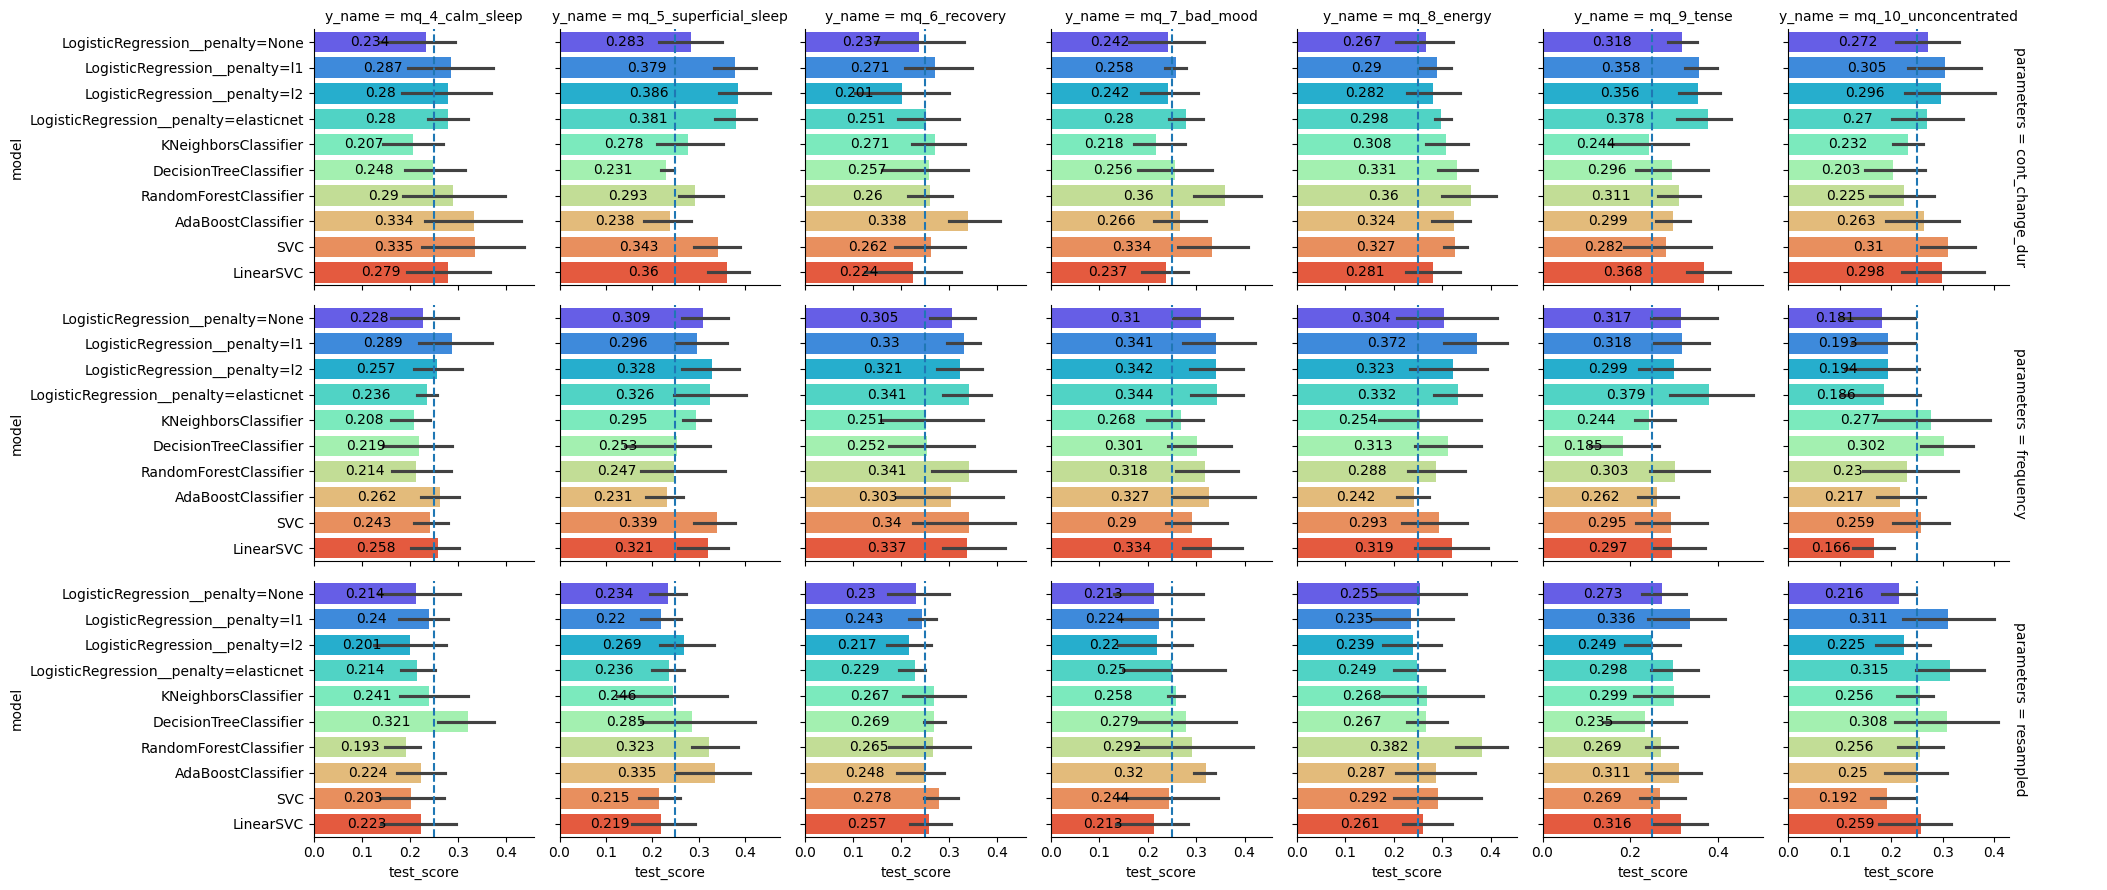

In [187]:
g = sns.FacetGrid(
    data=ss_clf_CV_scores,
    col="y_name",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="test_score",
    y="model",
    palette="rainbow",
    legend=False,
    hue="model",
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(i, fmt="{:.3}", label_type="center")
    ax.axvline(0.25, label="chance", ls="--")
g.add_legend()

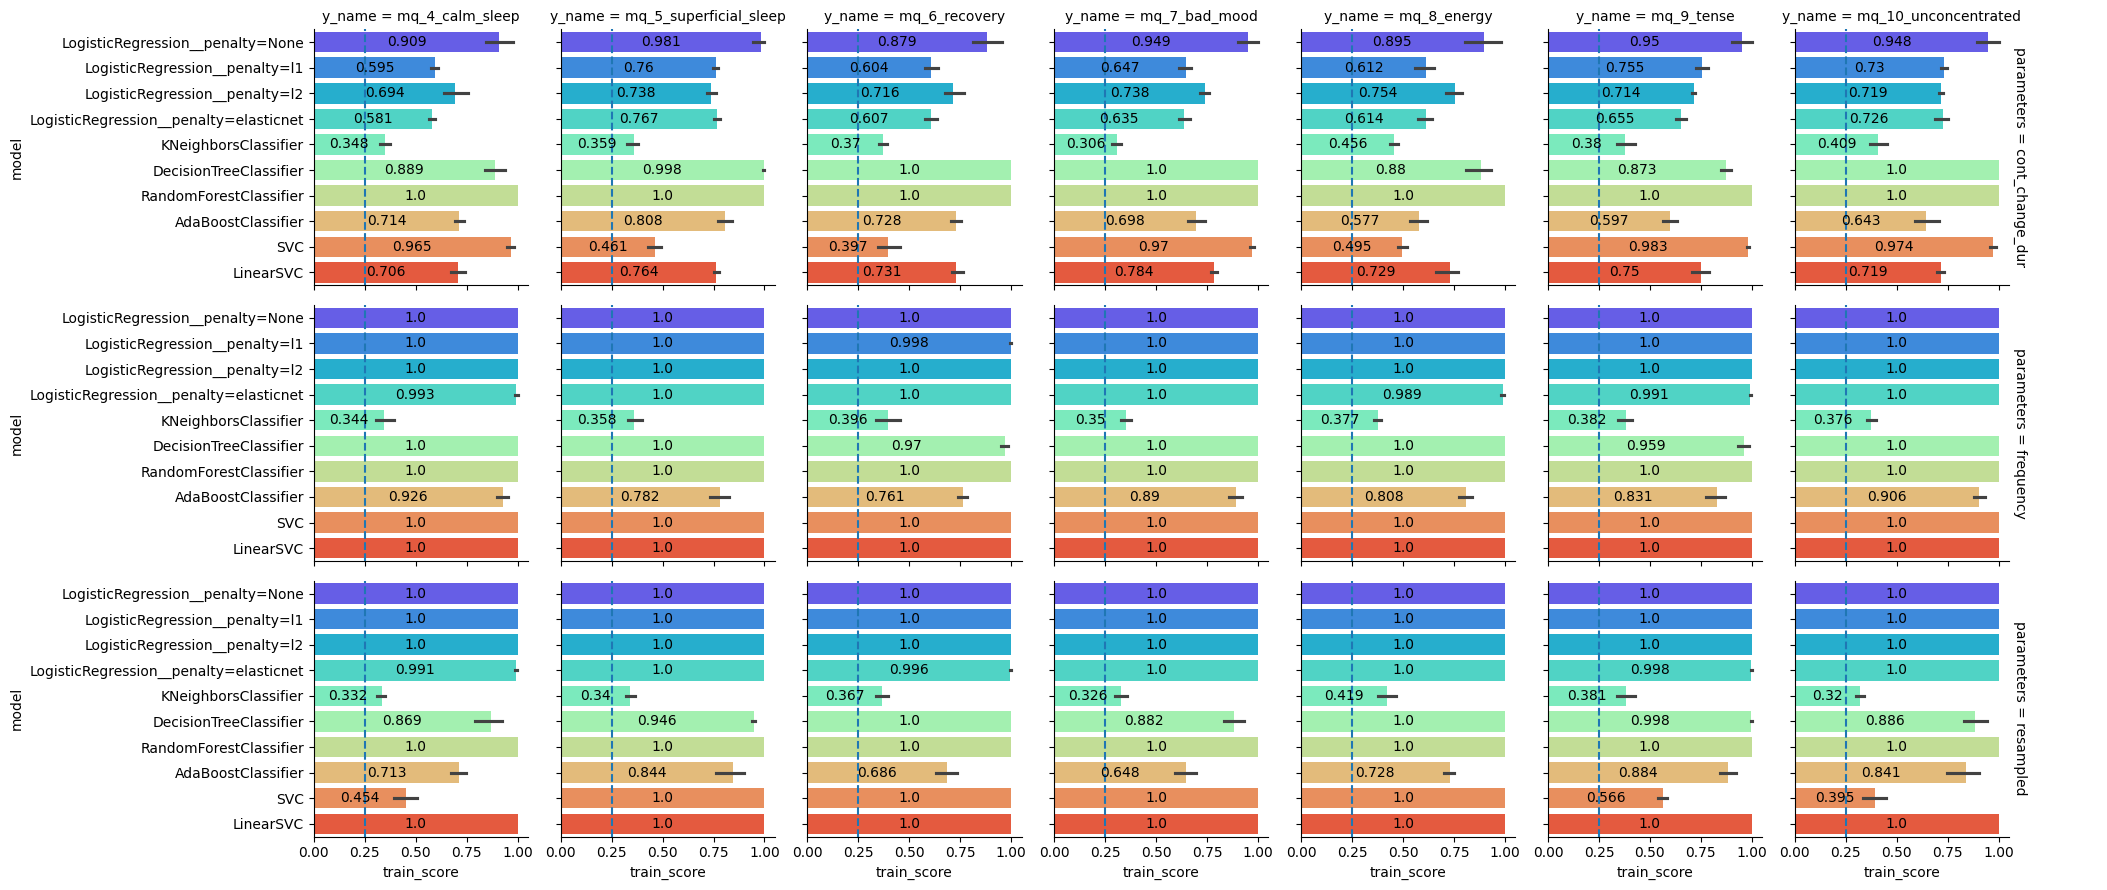

In [188]:
g = sns.FacetGrid(
    data=ss_clf_CV_scores,
    col="y_name",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="train_score",
    y="model",
    palette="rainbow",
    legend=False,
    hue="model",
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(i, fmt="{:.3}", label_type="center")
    ax.axvline(0.25, label="chance", ls="--")
g.add_legend()

### 3.1.2 Best Plot CLF results for each mq

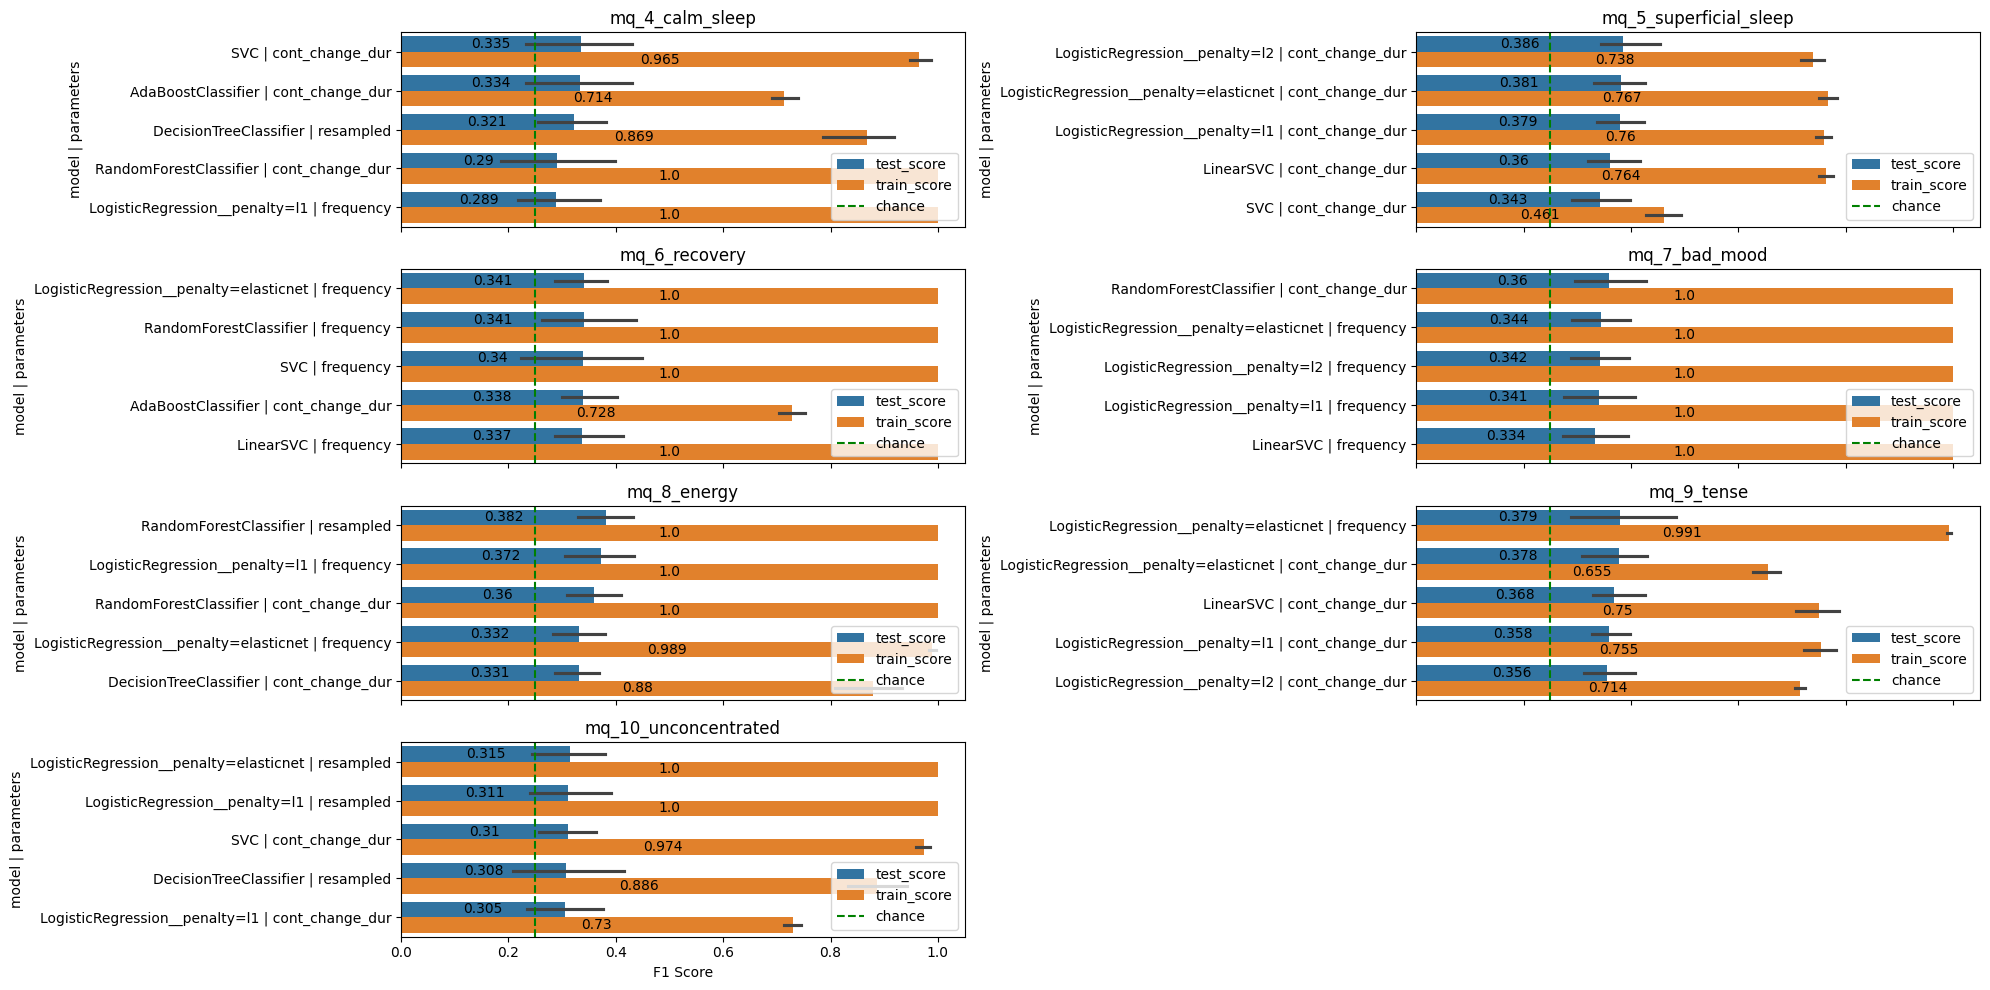

In [122]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(20, 10))
for i, (ax, y_name) in enumerate(
    zip(axes.flatten(), ss_clf_CV_scores["y_name"].unique()), start=1
):
    plot_y_name_top_X_best_model_params_combo(
        ss_clf_CV_scores, y_name, X=5, ax=ax, smaller_is_better=False, chance_level=0.25
    )
    ax.set_title(y_name)
    if i == 6:
        ax.set_xlabel("Yeah")
axes.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 3.2. Plot REG with SS data

### 3.2.1 Plot train and test

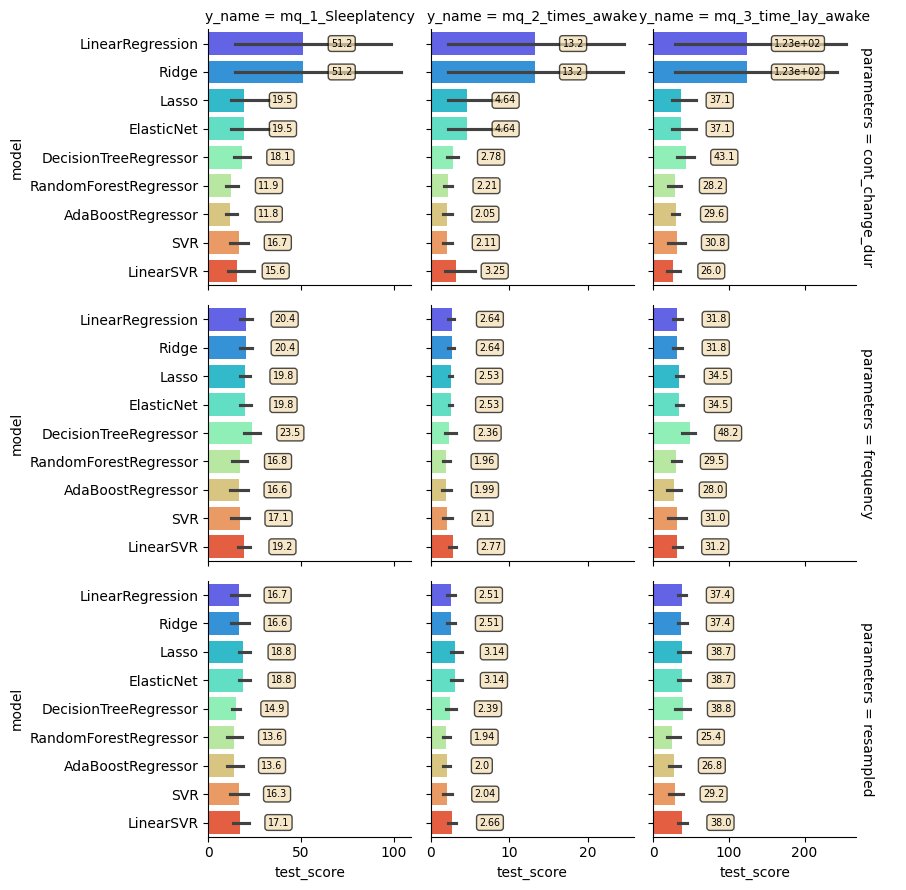

In [18]:
g = sns.FacetGrid(
    data=ss_reg_CV_scores,
    col="y_name",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="test_score",
    y="model",
    palette="rainbow",
    legend=False,
    hue="model",
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(
            i,
            fmt="{:.3}",
            label_type="edge",
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.7),
            padding=20,
            fontsize="x-small",
        )
g.add_legend()

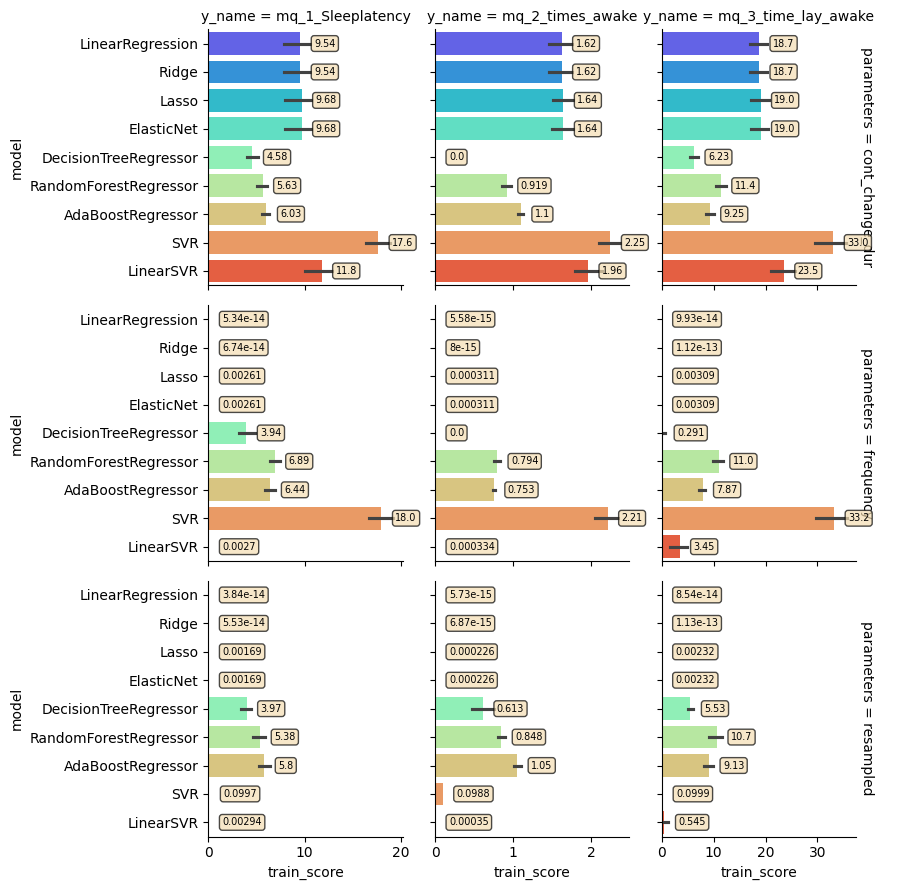

In [19]:
g = sns.FacetGrid(
    data=ss_reg_CV_scores,
    col="y_name",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="train_score",
    y="model",
    palette="rainbow",
    legend=False,
    hue="model",
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(
            i,
            fmt="{:.3}",
            label_type="edge",
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.7),
            padding=10,
            fontsize="x-small",
        )
g.add_legend()

### 3.2.2 Top 5 models for each MQ

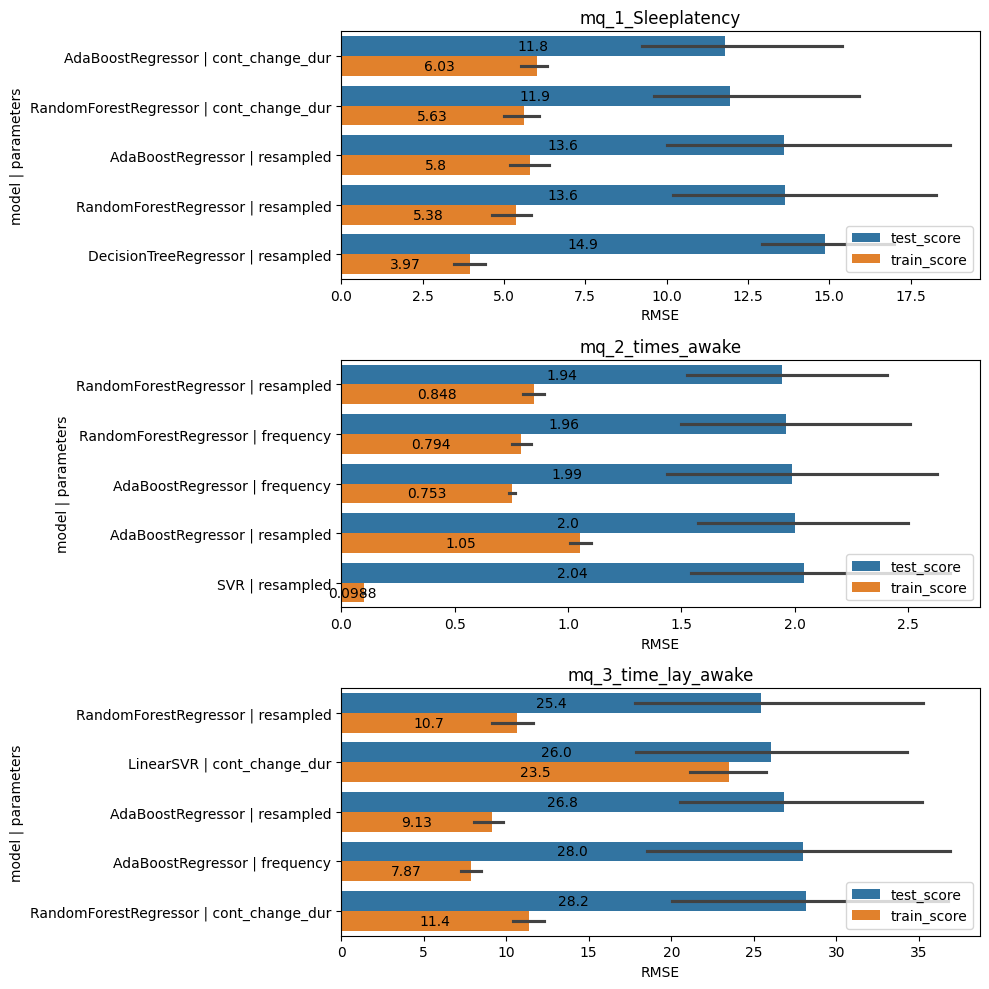

In [123]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, figsize=(10, 10))
for ax, y_name in zip(axes.flatten(), ss_reg_CV_scores["y_name"].unique()):
    plot_y_name_top_X_best_model_params_combo(
        ss_reg_CV_scores,
        y_name,
        X=5,
        ax=ax,
        smaller_is_better=True,
        chance_level=None,
        value_name="RMSE",
    )
    ax.set_title(y_name)
plt.tight_layout()
plt.show()

## 3.3. Plot CLF with EEG data

### 3.3.1 Plot train & test

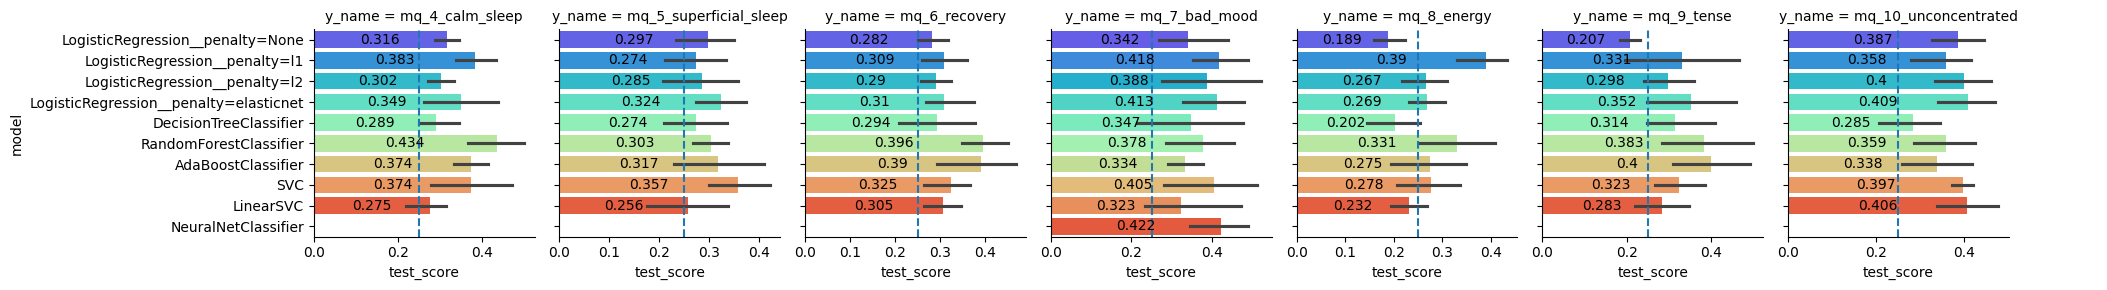

In [133]:
g = sns.FacetGrid(
    data=eeg_clf_CV_scores,
    col="y_name",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="test_score",
    y="model",
    palette="rainbow",
    legend=False,
    hue="model",
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(i, fmt="{:.3}", label_type="center")
    ax.axvline(0.25, label="chance", ls="--")
g.add_legend()

### 3.3.2 Top 5 best models

In [156]:
eeg_clf_optimised_CV_scores

model  fold  test_score  train_score  \
0   LogisticRegression__penalty=None     0    0.372149     1.000000   
1   LogisticRegression__penalty=None     1    0.275819     1.000000   
2   LogisticRegression__penalty=None     2    0.313636     1.000000   
3   LogisticRegression__penalty=None     3    0.297186     1.000000   
4   LogisticRegression__penalty=None     4    0.319231     1.000000   
..                               ...   ...         ...          ...   
0                NeuralNetClassifier     0    0.465126     0.766125   
1                NeuralNetClassifier     1    0.423576     0.716634   
2                NeuralNetClassifier     2    0.278095     0.695141   
3                NeuralNetClassifier     3    0.424107     0.692141   
4                NeuralNetClassifier     4    0.519148     0.633137   

             y_name  
0   mq_4_calm_sleep  
1   mq_4_calm_sleep  
2   mq_4_calm_sleep  
3   mq_4_calm_sleep  
4   mq_4_calm_sleep  
..              ...  
0     mq_7_bad_mood  
1     mq_7_bad_mood  
2     mq_7_bad_mood  
3     mq_7_bad_mood  
4     mq_7_bad_mood  

[320 rows x 5 columns]

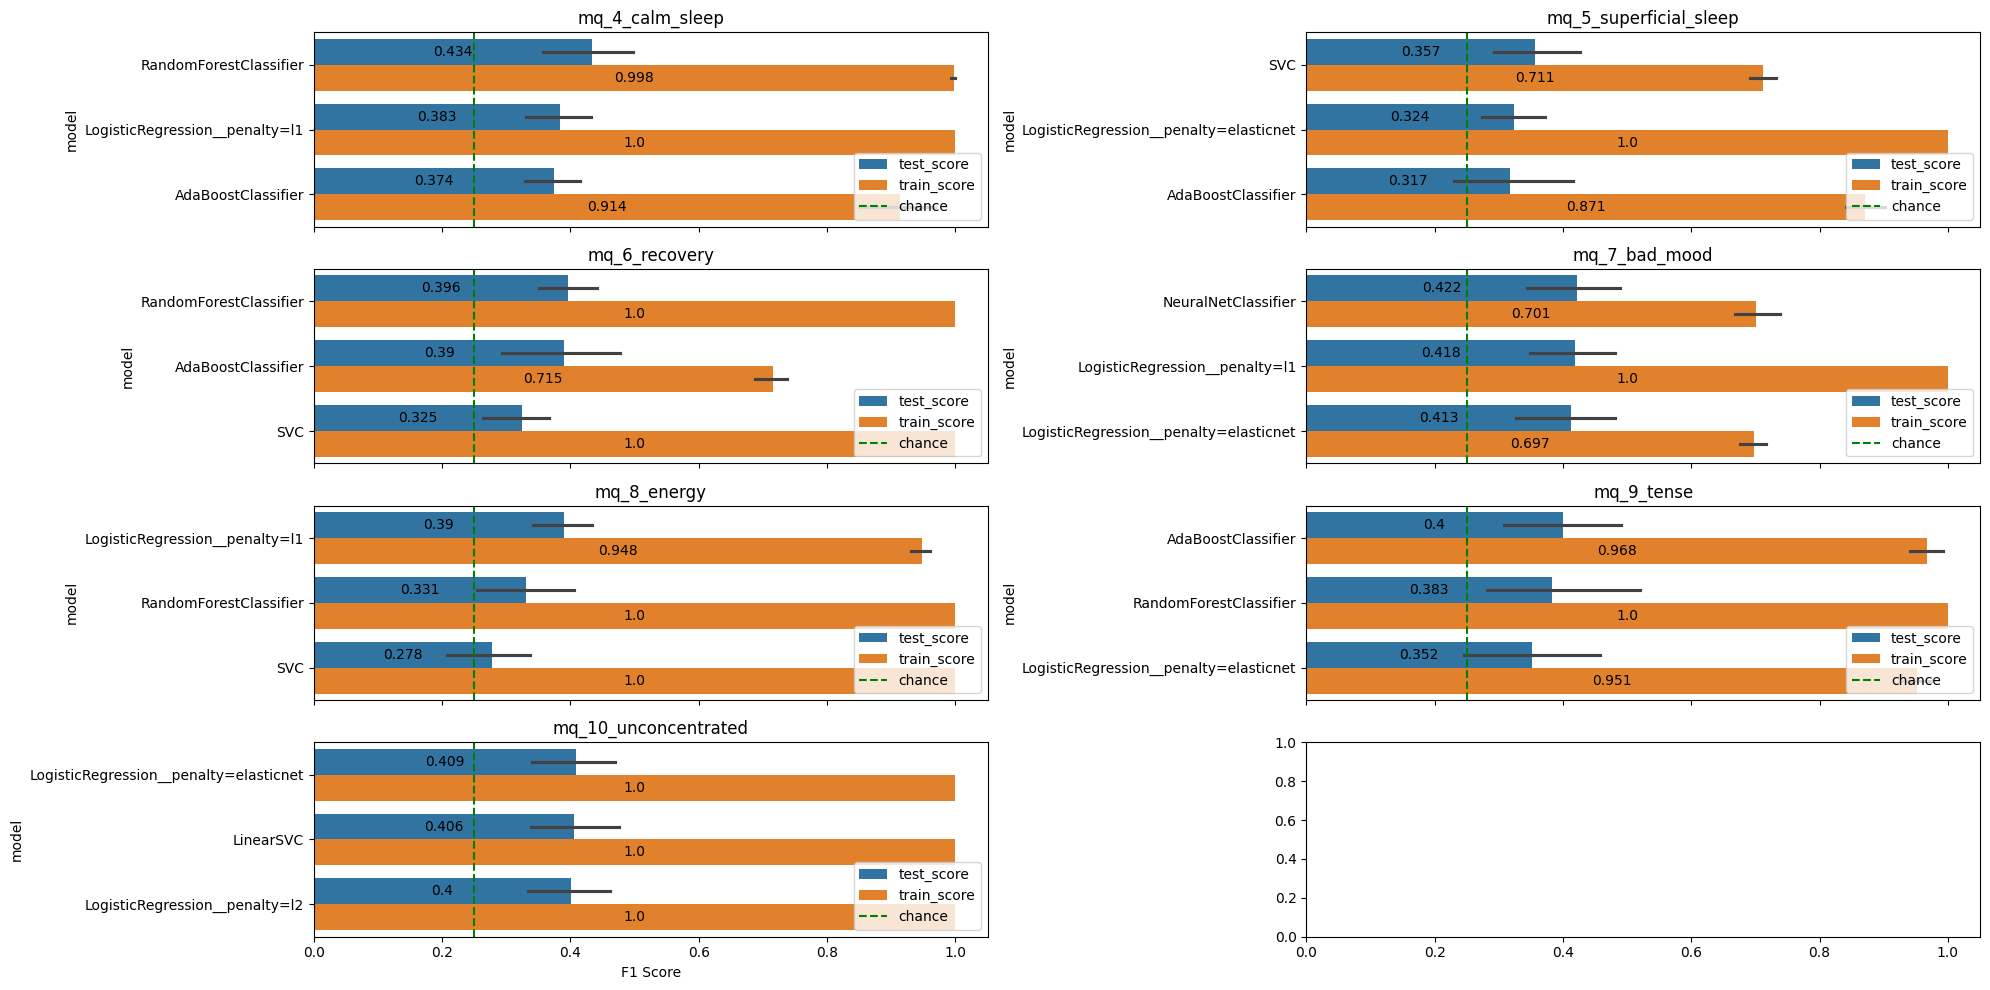

In [152]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(20, 10))
for ax, y_name in zip(axes.flatten(), eeg_clf_optimised_CV_scores["y_name"].unique()):
    plot_y_name_top_X_best_model_params_combo(
        eeg_clf_optimised_CV_scores,
        y_name,
        X=3,
        ax=ax,
        # smaller_is_better=True,
        # chance_level=None,
        # value_name="RMSE",
        fuse_models_params=False,
        by="model",
    )
    ax.set_title(y_name)
plt.tight_layout()
plt.show()

In [153]:
clf_CV_scores

model  fold  test_score  train_score  \
0    LogisticRegression__penalty=None     0    0.372149          1.0   
1    LogisticRegression__penalty=None     1    0.275819          1.0   
2    LogisticRegression__penalty=None     2    0.313636          1.0   
3    LogisticRegression__penalty=None     3    0.297186          1.0   
4    LogisticRegression__penalty=None     4    0.319231          1.0   
..                                ...   ...         ...          ...   
345                         LinearSVC     0    0.291667          1.0   
346                         LinearSVC     1    0.290382          1.0   
347                         LinearSVC     2    0.256187          1.0   
348                         LinearSVC     3    0.354555          1.0   
349                         LinearSVC     4    0.101449          1.0   

                   y_name parameters  
0         mq_4_calm_sleep  eeg_feats  
1         mq_4_calm_sleep  eeg_feats  
2         mq_4_calm_sleep  eeg_feats  
3         mq_4_calm_sleep  eeg_feats  
4         mq_4_calm_sleep  eeg_feats  
..                    ...        ...  
345  mq_10_unconcentrated  resampled  
346  mq_10_unconcentrated  resampled  
347  mq_10_unconcentrated  resampled  
348  mq_10_unconcentrated  resampled  
349  mq_10_unconcentrated  resampled  

[1370 rows x 6 columns]

## 3.4 On all CLF data

In [290]:
clf_mq_title_mapping = {
    "mq_4_calm_sleep": "MQ4: Calm Sleep",
    "mq_5_superficial_sleep": "MQ5: Superficial Sleep",
    "mq_6_recovery": "MQ6: Recovery",
    "mq_7_bad_mood": "MQ7: Bad Mood",
    "mq_8_energy": "MQ8: Energy",
    "mq_9_tense": "MQ9: Tense",
    "mq_10_unconcentrated": "MQ10: Unconcentrated",
}

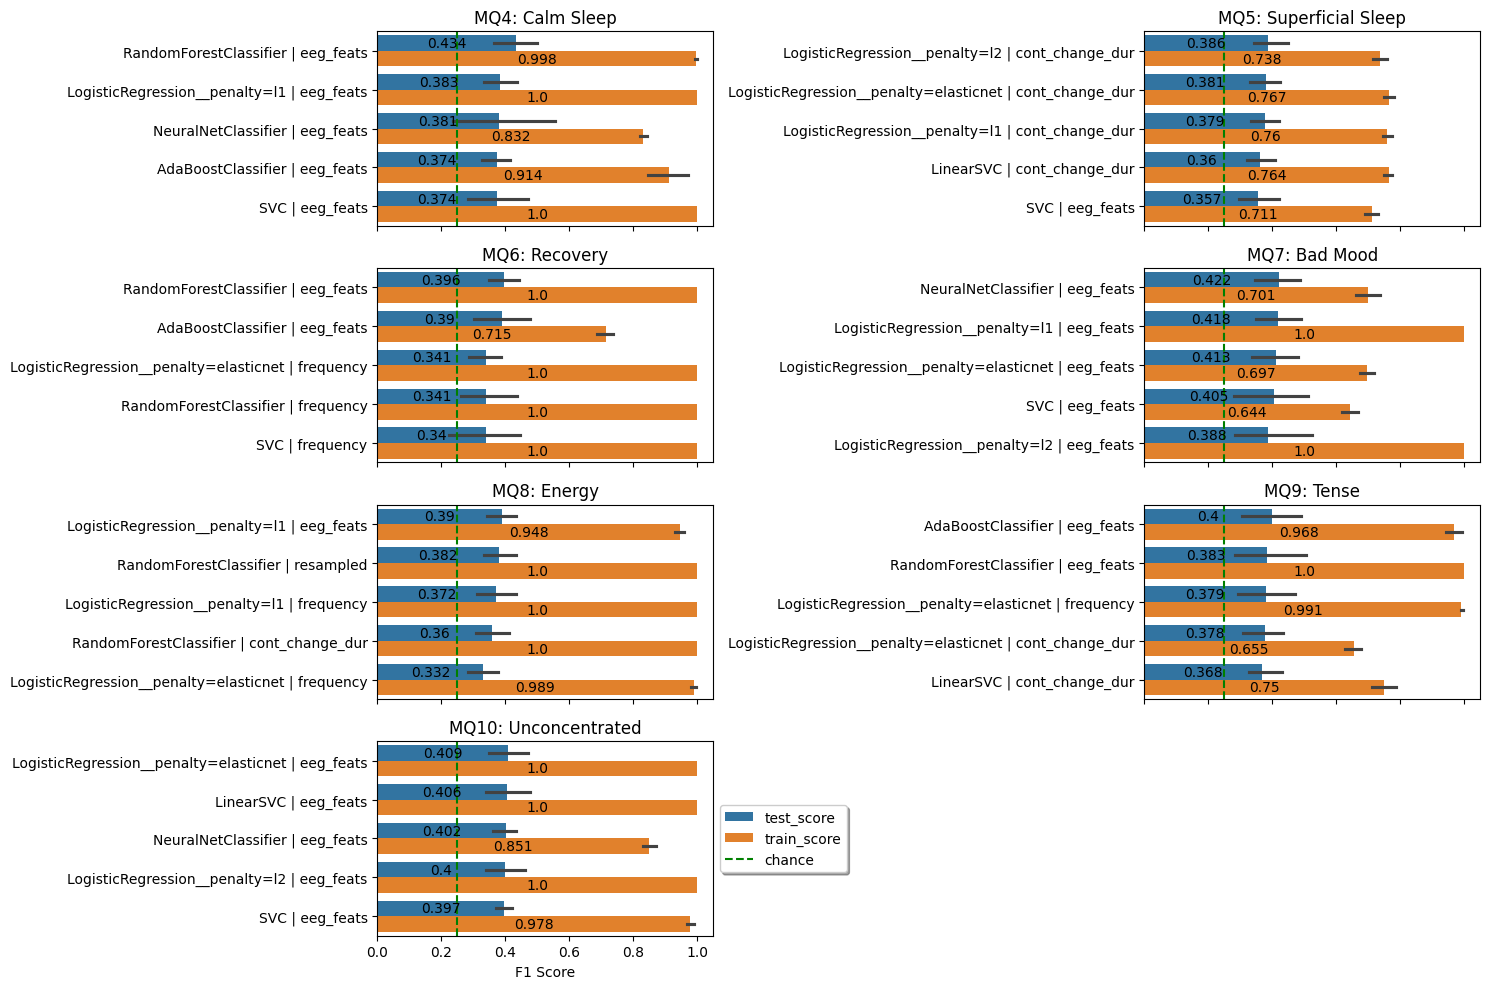

In [291]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(15, 10))
titles = list(clf_mq_title_mapping.values())
for i, (ax, y_name, title) in enumerate(
    zip(axes.flatten(), clf_CV_scores["y_name"].unique(), titles), 1
):
    plot_y_name_top_X_best_model_params_combo(
        clf_CV_scores,
        y_name,
        X=5,
        ax=ax,
        # smaller_is_better=True,
        # chance_level=None,
        # value_name="RMSE",
        # fuse_models_params=False,
        # by="model"
    )
    ax.set_title(title)
    if i != 7:
        ax.get_legend().remove()
    else:
        ax.legend(
            loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True
        )
    ax.set_ylabel("")
axes.flatten()[-1].set_visible(False)
plt.tight_layout()
plt.savefig("../figures/top_5_best_models_for_MQ4-10.png", dpi=400)
plt.show()

In [214]:
clf_CV_scores.model.unique().shape

(11,)

In [220]:
sns.color_palette("Paired", 11)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6)]

In [224]:
clf_CV_scores

model  fold  test_score  train_score  \
0    LogisticRegression__penalty=None     0    0.372149          1.0   
1    LogisticRegression__penalty=None     1    0.275819          1.0   
2    LogisticRegression__penalty=None     2    0.313636          1.0   
3    LogisticRegression__penalty=None     3    0.297186          1.0   
4    LogisticRegression__penalty=None     4    0.319231          1.0   
..                                ...   ...         ...          ...   
345                         LinearSVC     0    0.291667          1.0   
346                         LinearSVC     1    0.290382          1.0   
347                         LinearSVC     2    0.256187          1.0   
348                         LinearSVC     3    0.354555          1.0   
349                         LinearSVC     4    0.101449          1.0   

                   y_name parameters  
0         mq_4_calm_sleep  eeg_feats  
1         mq_4_calm_sleep  eeg_feats  
2         mq_4_calm_sleep  eeg_feats  
3         mq_4_calm_sleep  eeg_feats  
4         mq_4_calm_sleep  eeg_feats  
..                    ...        ...  
345  mq_10_unconcentrated  resampled  
346  mq_10_unconcentrated  resampled  
347  mq_10_unconcentrated  resampled  
348  mq_10_unconcentrated  resampled  
349  mq_10_unconcentrated  resampled  

[1400 rows x 6 columns]

In [232]:
clf_rename_cols = {"test_score": "Test F1", "train_score": "Train F1", "y_name": "MQ"}

In [237]:
plotting_clf_CV_scores = clf_CV_scores.rename(columns=clf_rename_cols)
plotting_clf_CV_scores["MQ"] = plotting_clf_CV_scores["MQ"].map(clf_mq_title_mapping)
plotting_clf_CV_scores

model  fold   Test F1  Train F1  \
0    LogisticRegression__penalty=None     0  0.372149       1.0   
1    LogisticRegression__penalty=None     1  0.275819       1.0   
2    LogisticRegression__penalty=None     2  0.313636       1.0   
3    LogisticRegression__penalty=None     3  0.297186       1.0   
4    LogisticRegression__penalty=None     4  0.319231       1.0   
..                                ...   ...       ...       ...   
345                         LinearSVC     0  0.291667       1.0   
346                         LinearSVC     1  0.290382       1.0   
347                         LinearSVC     2  0.256187       1.0   
348                         LinearSVC     3  0.354555       1.0   
349                         LinearSVC     4  0.101449       1.0   

                       MQ parameters  
0         MQ4: Calm Sleep  eeg_feats  
1         MQ4: Calm Sleep  eeg_feats  
2         MQ4: Calm Sleep  eeg_feats  
3         MQ4: Calm Sleep  eeg_feats  
4         MQ4: Calm Sleep  eeg_feats  
..                    ...        ...  
345  MQ10: Unconcentrated  resampled  
346  MQ10: Unconcentrated  resampled  
347  MQ10: Unconcentrated  resampled  
348  MQ10: Unconcentrated  resampled  
349  MQ10: Unconcentrated  resampled  

[1400 rows x 6 columns]

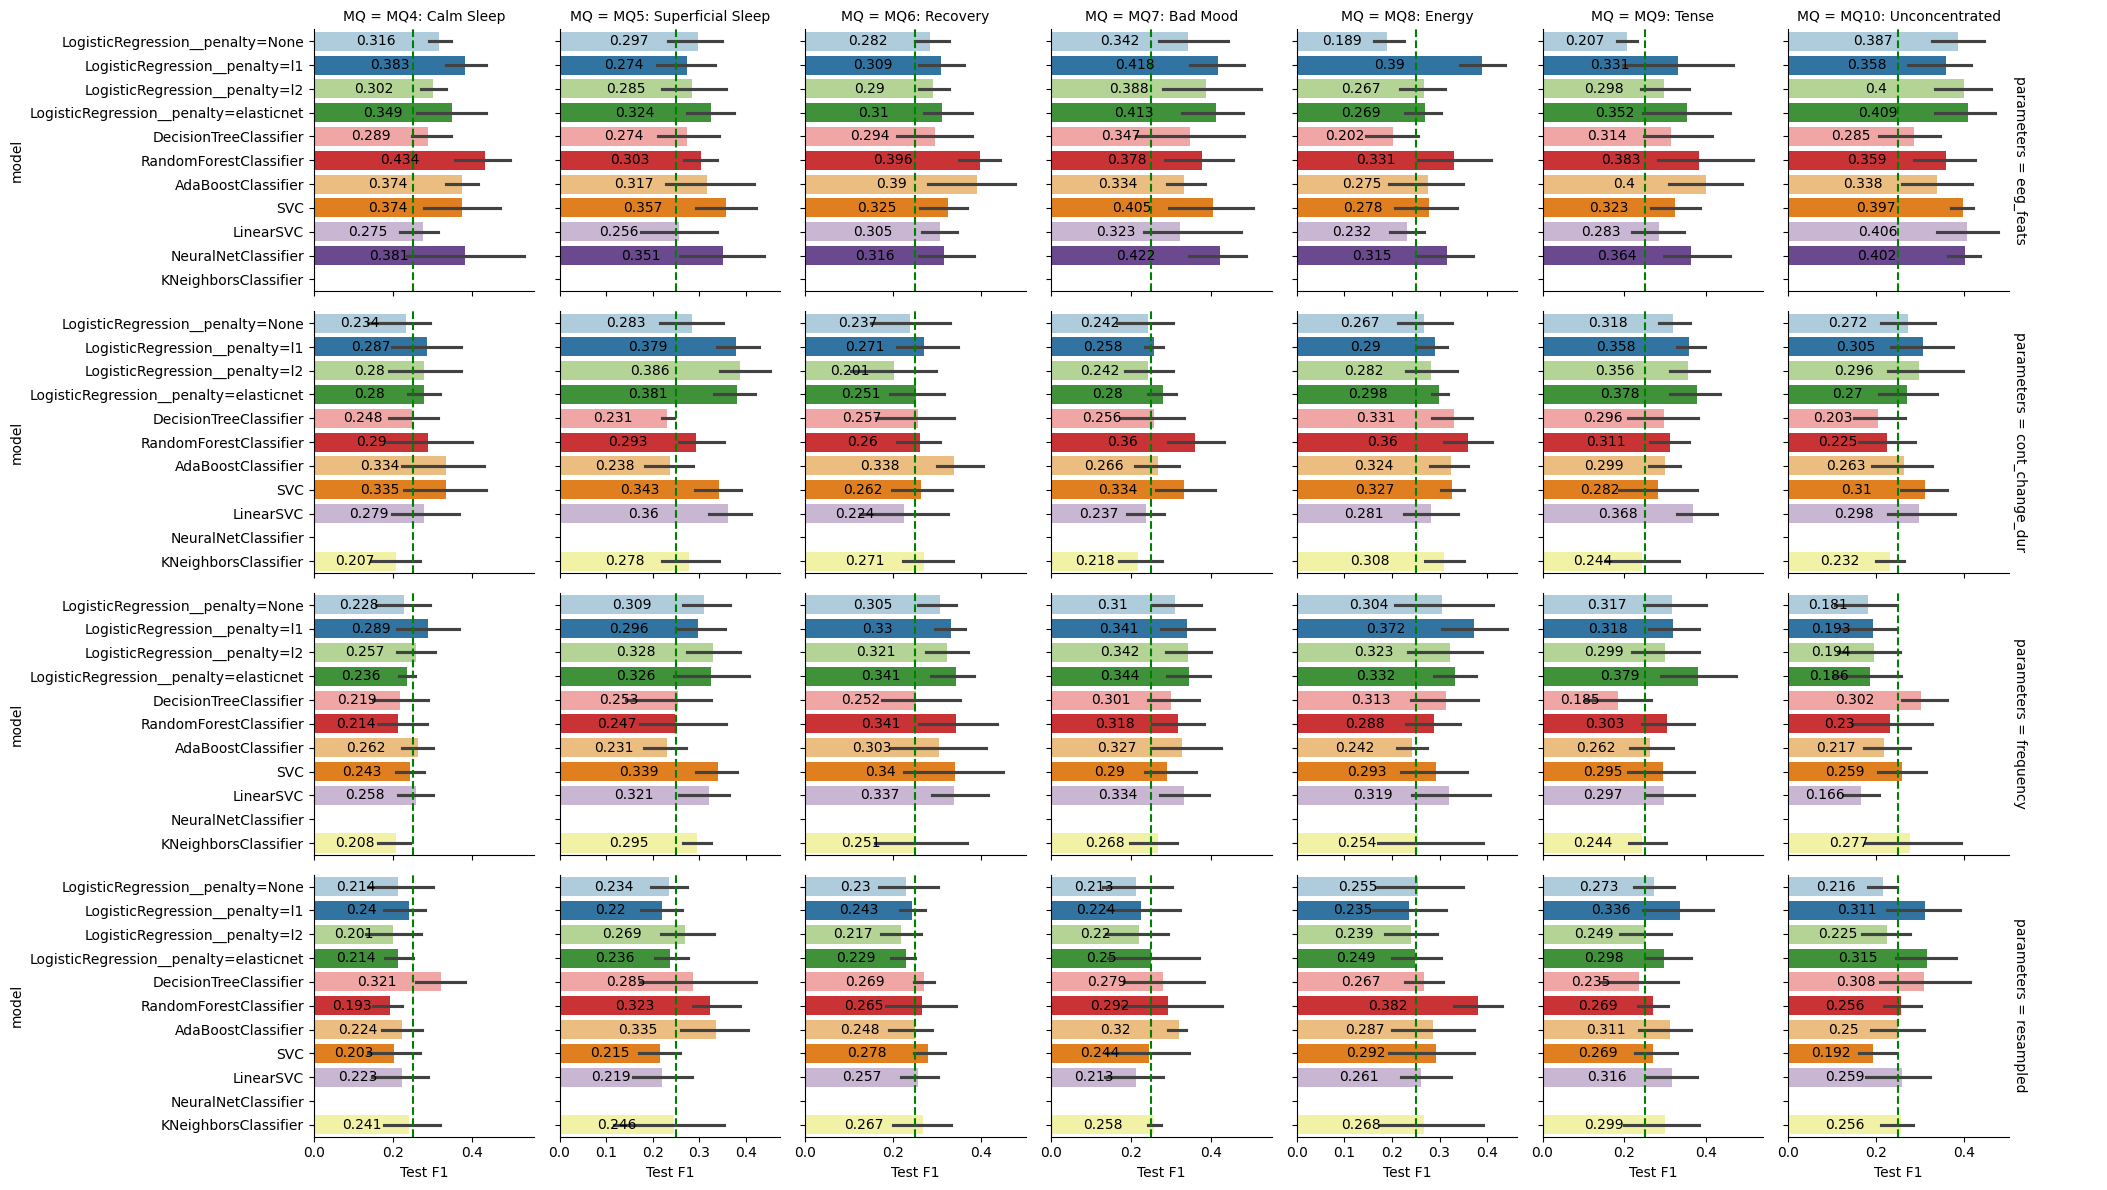

In [534]:
g = sns.FacetGrid(
    data=plotting_clf_CV_scores,
    col="MQ",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="Test F1",
    y="model",
    palette=sns.color_palette("Paired", 11),
    legend=False,
    hue="model",
    hue_order=[
        "LogisticRegression__penalty=None",
        "LogisticRegression__penalty=l1",
        "LogisticRegression__penalty=l2",
        "LogisticRegression__penalty=elasticnet",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "AdaBoostClassifier",
        "SVC",
        "LinearSVC",
        "NeuralNetClassifier",
        "KNeighborsClassifier",
    ],
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(i, fmt="{:.3}", label_type="center")
    ax.axvline(0.25, label="chance", ls="--", c="green")
g.add_legend()
plt.savefig("../figures/best_models_across_MQ4-10_test_F1.png", dpi=400)

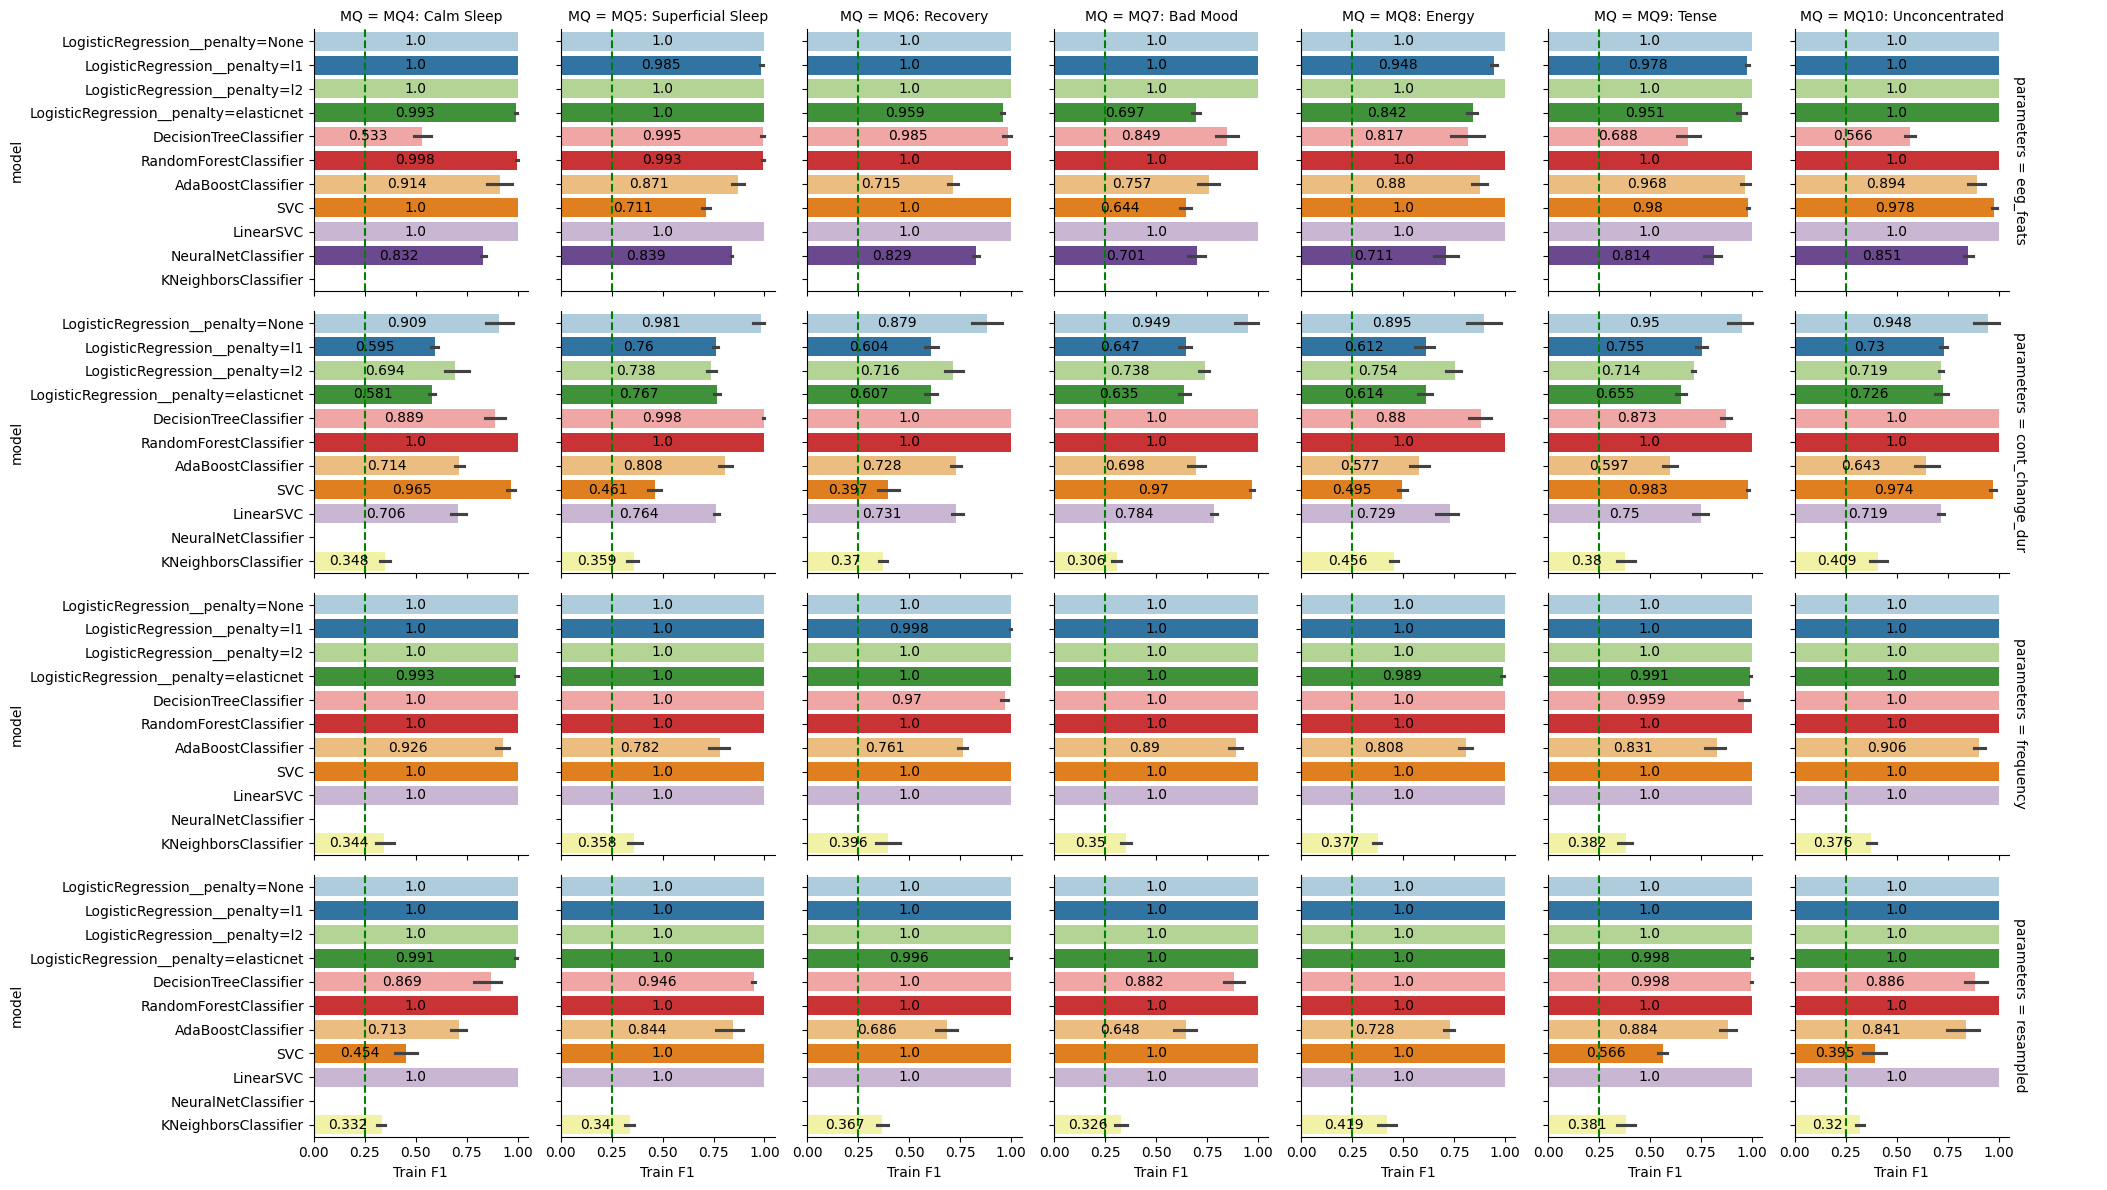

In [533]:
g = sns.FacetGrid(
    data=plotting_clf_CV_scores,
    col="MQ",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="Train F1",
    y="model",
    palette=sns.color_palette("Paired", 11),
    legend=False,
    hue="model",
    hue_order=[
        "LogisticRegression__penalty=None",
        "LogisticRegression__penalty=l1",
        "LogisticRegression__penalty=l2",
        "LogisticRegression__penalty=elasticnet",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "AdaBoostClassifier",
        "SVC",
        "LinearSVC",
        "NeuralNetClassifier",
        "KNeighborsClassifier",
    ],
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(i, fmt="{:.3}", label_type="center")
    ax.axvline(0.25, label="chance", ls="--", c="green")
g.add_legend()
plt.savefig("../figures/best_models_across_MQ4-10_train_F1.png", dpi=400)

## 3.5 On all REG data

In [262]:
reg_mq_title_mapping = {
    "mq_1_Sleeplatency": "MQ1: Sleep Latency",
    "mq_2_times_awake": "MQ2: Times Awake",
    "mq_3_time_lay_awake": "MQ3: Time Lay Awake",
}

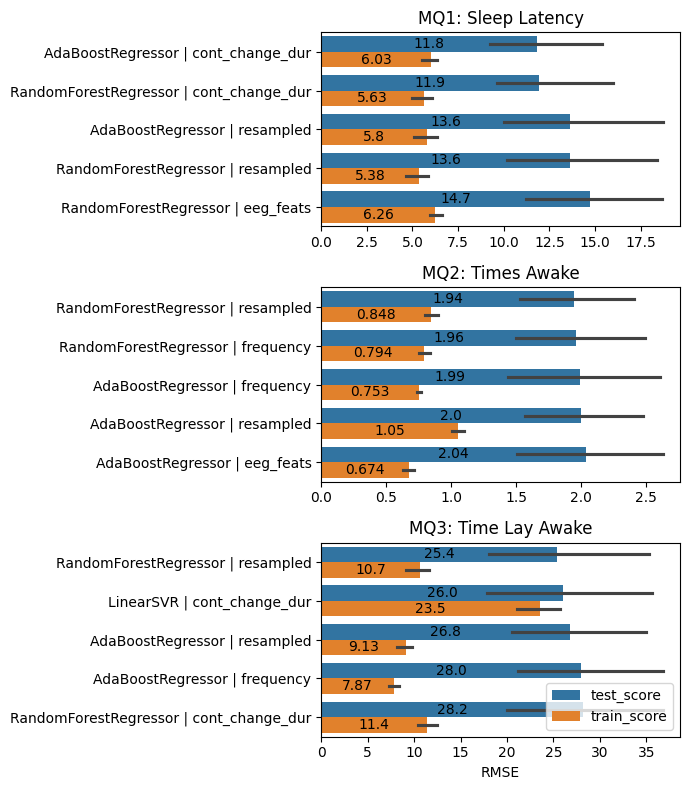

In [278]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, figsize=(7, 8))
titles = list(reg_mq_title_mapping.values())
for i, (ax, y_name, title) in enumerate(
    zip(axes.flatten(), reg_CV_scores["y_name"].unique(), titles), 1
):
    plot_y_name_top_X_best_model_params_combo(
        reg_CV_scores,
        y_name,
        X=5,
        ax=ax,
        smaller_is_better=True,
        chance_level=None,
        value_name="RMSE",
        # fuse_models_params=False,
        # by="model"
    )
    ax.set_title(title)
    if i != 3:
        ax.get_legend().remove()
        ax.set_xlabel("")
    # else:
    #     ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)
    ax.set_ylabel("")
# axes.flatten()[-1].set_visible(False)
plt.tight_layout()
plt.savefig("../figures/top_5_best_models_for_MQ1-3.png", dpi=400)
plt.show()

In [582]:
reg_CV_scores.model.unique()

array(['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet',
       'DecisionTreeRegressor', 'RandomForestRegressor',
       'AdaBoostRegressor', 'SVR', 'LinearSVR'], dtype=object)

In [585]:
reg_short_mapping = {
    "LinearRegression": "LR",
    "Ridge": "L2",
    "Lasso": "L1",
    "ElasticNet": "EN",
    "DecisionTreeRegressor": "DTR",
    "RandomForestRegressor": "RFR",
    "AdaBoostRegressor": "ABR",
    "SVR": "SVR",
    "LinearSVR": "LSVR",
}
reg_CV_scores_shorter_model_name = reg_CV_scores.copy(deep=True)
reg_CV_scores_shorter_model_name["model"] = reg_CV_scores["model"].map(
    reg_short_mapping
)
reg_CV_scores_shorter_model_name

model fold test_score train_score               y_name       parameters
0      LR    0  65.749817    6.166832    mq_1_Sleeplatency  cont_change_dur
1      LR    1   147.5066   10.678024    mq_1_Sleeplatency  cont_change_dur
2      LR    2  15.242526   10.323108    mq_1_Sleeplatency  cont_change_dur
3      LR    3  15.130512   10.184535    mq_1_Sleeplatency  cont_change_dur
4      LR    4  12.481658   10.339646    mq_1_Sleeplatency  cont_change_dur
..    ...  ...        ...         ...                  ...              ...
130  LSVR    0  24.790285    27.66361  mq_3_time_lay_awake        eeg_feats
131  LSVR    1  29.495811   24.727836  mq_3_time_lay_awake        eeg_feats
132  LSVR    2  35.577168   27.518165  mq_3_time_lay_awake        eeg_feats
133  LSVR    3  51.130131   17.276995  mq_3_time_lay_awake        eeg_feats
134  LSVR    4  28.736121   26.990345  mq_3_time_lay_awake        eeg_feats

[540 rows x 6 columns]

In [586]:
clf_CV_scores.model.unique()

array(['LogisticRegression__penalty=None',
       'LogisticRegression__penalty=l1', 'LogisticRegression__penalty=l2',
       'LogisticRegression__penalty=elasticnet', 'DecisionTreeClassifier',
       'RandomForestClassifier', 'AdaBoostClassifier', 'SVC', 'LinearSVC',
       'NeuralNetClassifier', 'KNeighborsClassifier'], dtype=object)

In [587]:
clf_short_mapping = {
    "LogisticRegression__penalty=None": "LR",
    "LogisticRegression__penalty=l1": "L1",
    "LogisticRegression__penalty=l2": "L2",
    "LogisticRegression__penalty=elasticnet": "EN",
    "DecisionTreeClassifier": "DTC",
    "RandomForestClassifier": "RFC",
    "AdaBoostClassifier": "ABC",
    "SVC": "SVC",
    "LinearSVC": "LSVC",
    "NeuralNetClassifier": "NNC",
    "KNeighborsClassifier": "KNNC",
}
clf_CV_scores_shorter_model_name = clf_CV_scores.copy(deep=True)
clf_CV_scores_shorter_model_name["model"] = clf_CV_scores["model"].map(
    clf_short_mapping
)
clf_CV_scores_shorter_model_name

model  fold  test_score  train_score                y_name parameters
0      LR     0    0.372149          1.0       mq_4_calm_sleep  eeg_feats
1      LR     1    0.275819          1.0       mq_4_calm_sleep  eeg_feats
2      LR     2    0.313636          1.0       mq_4_calm_sleep  eeg_feats
3      LR     3    0.297186          1.0       mq_4_calm_sleep  eeg_feats
4      LR     4    0.319231          1.0       mq_4_calm_sleep  eeg_feats
..    ...   ...         ...          ...                   ...        ...
345  LSVC     0    0.291667          1.0  mq_10_unconcentrated  resampled
346  LSVC     1    0.290382          1.0  mq_10_unconcentrated  resampled
347  LSVC     2    0.256187          1.0  mq_10_unconcentrated  resampled
348  LSVC     3    0.354555          1.0  mq_10_unconcentrated  resampled
349  LSVC     4    0.101449          1.0  mq_10_unconcentrated  resampled

[1400 rows x 6 columns]

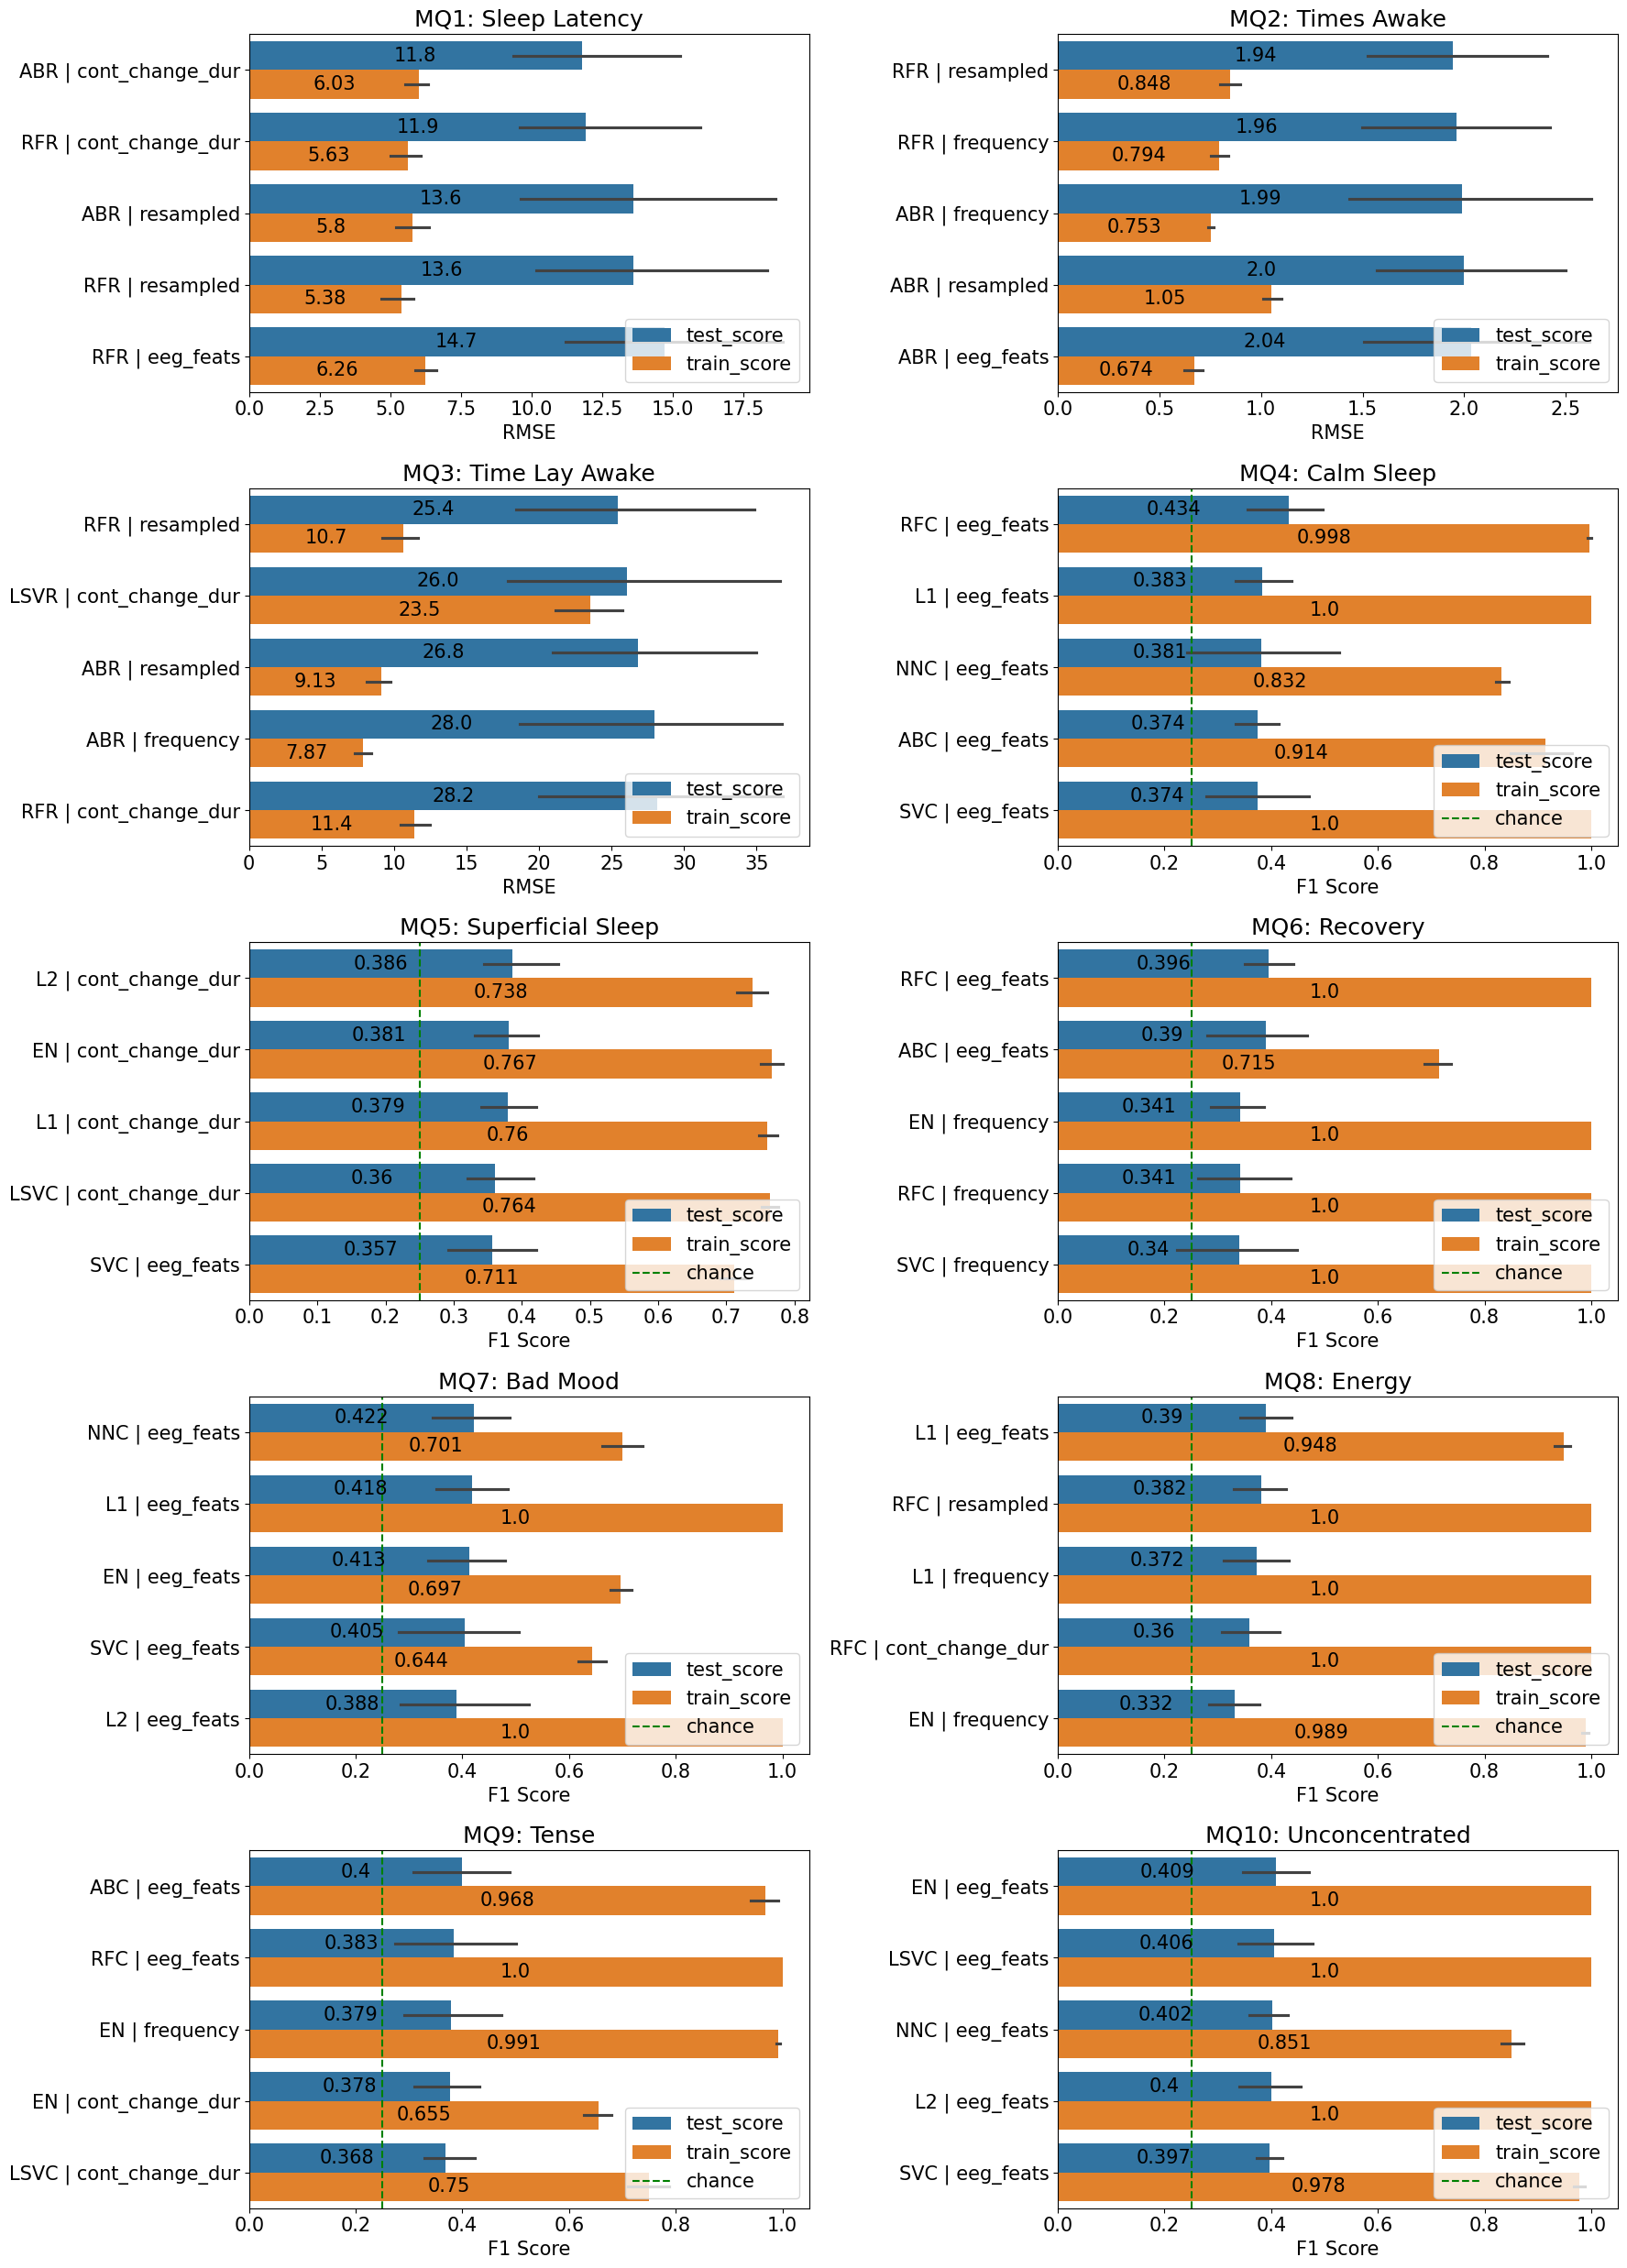

In [597]:
import matplotlib

# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update({"font.size": 15})

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 10}

# matplotlib.rc('font', **font)


fig, axes = plt.subplots(nrows=5, ncols=2, sharex=False, figsize=(18, 25))


titles = list(reg_mq_title_mapping.values())
for i, (ax, y_name, title) in enumerate(
    zip(axes.flatten()[:3], reg_CV_scores["y_name"].unique(), titles), 1
):
    plot_y_name_top_X_best_model_params_combo(
        reg_CV_scores_shorter_model_name,
        y_name,
        X=5,
        ax=ax,
        smaller_is_better=True,
        chance_level=None,
        value_name="RMSE",
        # fuse_models_params=False,
        # by="model"
        bar_label_fontsize=15,
        legend_fontsize=15,
    )
    ax.set_title(title)
    # if i != 3:
    #     ax.get_legend().remove()
    #     ax.set_xlabel("")
    # else:
    #     ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)
    ax.set_ylabel("")
# axes.flatten()[-1].set_visible(False)


# fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(15, 10))
titles = list(clf_mq_title_mapping.values())
for i, (ax, y_name, title) in enumerate(
    zip(axes.flatten()[3:], clf_CV_scores["y_name"].unique(), titles), 1
):
    plot_y_name_top_X_best_model_params_combo(
        clf_CV_scores_shorter_model_name,
        y_name,
        X=5,
        ax=ax,
        # smaller_is_better=True,
        # chance_level=None,
        # value_name="RMSE",
        # fuse_models_params=False,
        # by="model"
        bar_label_fontsize=15,
        legend_fontsize=15,
    )
    ax.set_title(title)
    # if i != 7:
    #     ax.get_legend().remove()
    # else:
    #     ax.legend(
    #         loc="center left", bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True
    #     )
    ax.set_ylabel("")
# axes.flatten()[-1].set_visible(False)


plt.tight_layout()
plt.savefig("../figures/top_5_best_models_for_MQ1-10.png", dpi=400)
plt.show()

In [280]:
reg_rename_cols = {
    "test_score": "Test RMSE",
    "train_score": "Train RMSE",
    "y_name": "MQ",
}

In [281]:
plotting_reg_CV_scores = reg_CV_scores.rename(columns=reg_rename_cols)
plotting_reg_CV_scores["MQ"] = plotting_reg_CV_scores["MQ"].map(reg_mq_title_mapping)
plotting_reg_CV_scores

model fold  Test RMSE Train RMSE                   MQ  \
0    LinearRegression    0  65.749817   6.166832   MQ1: Sleep Latency   
1    LinearRegression    1   147.5066  10.678024   MQ1: Sleep Latency   
2    LinearRegression    2  15.242526  10.323108   MQ1: Sleep Latency   
3    LinearRegression    3  15.130512  10.184535   MQ1: Sleep Latency   
4    LinearRegression    4  12.481658  10.339646   MQ1: Sleep Latency   
..                ...  ...        ...        ...                  ...   
130         LinearSVR    0  24.790285   27.66361  MQ3: Time Lay Awake   
131         LinearSVR    1  29.495811  24.727836  MQ3: Time Lay Awake   
132         LinearSVR    2  35.577168  27.518165  MQ3: Time Lay Awake   
133         LinearSVR    3  51.130131  17.276995  MQ3: Time Lay Awake   
134         LinearSVR    4  28.736121  26.990345  MQ3: Time Lay Awake   

          parameters  
0    cont_change_dur  
1    cont_change_dur  
2    cont_change_dur  
3    cont_change_dur  
4    cont_change_dur  
..               ...  
130        eeg_feats  
131        eeg_feats  
132        eeg_feats  
133        eeg_feats  
134        eeg_feats  

[540 rows x 6 columns]

In [283]:
plotting_reg_CV_scores.model.unique()

array(['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet',
       'DecisionTreeRegressor', 'RandomForestRegressor',
       'AdaBoostRegressor', 'SVR', 'LinearSVR'], dtype=object)

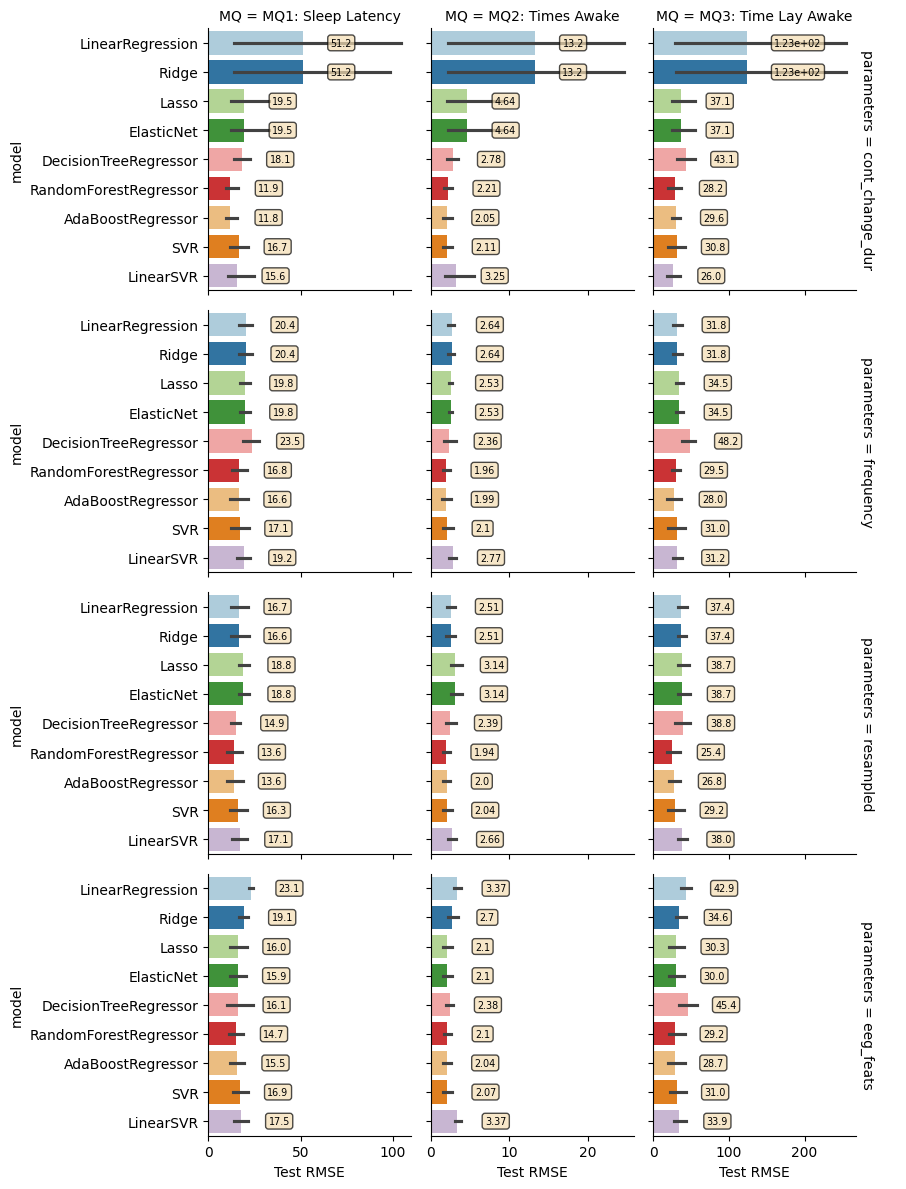

In [535]:
g = sns.FacetGrid(
    data=plotting_reg_CV_scores,
    col="MQ",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="Test RMSE",
    y="model",
    palette=sns.color_palette("Paired", 9),
    legend=False,
    hue="model",
    hue_order=[
        "LinearRegression",
        "Ridge",
        "Lasso",
        "ElasticNet",
        "DecisionTreeRegressor",
        "RandomForestRegressor",
        "AdaBoostRegressor",
        "SVR",
        "LinearSVR",
    ],
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(
            i,
            fmt="{:.3}",
            label_type="edge",
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.7),
            padding=20,
            fontsize="x-small",
        )
g.add_legend()
plt.savefig("../figures/best_models_across_MQ1-3_test_RMSE.png", dpi=400)

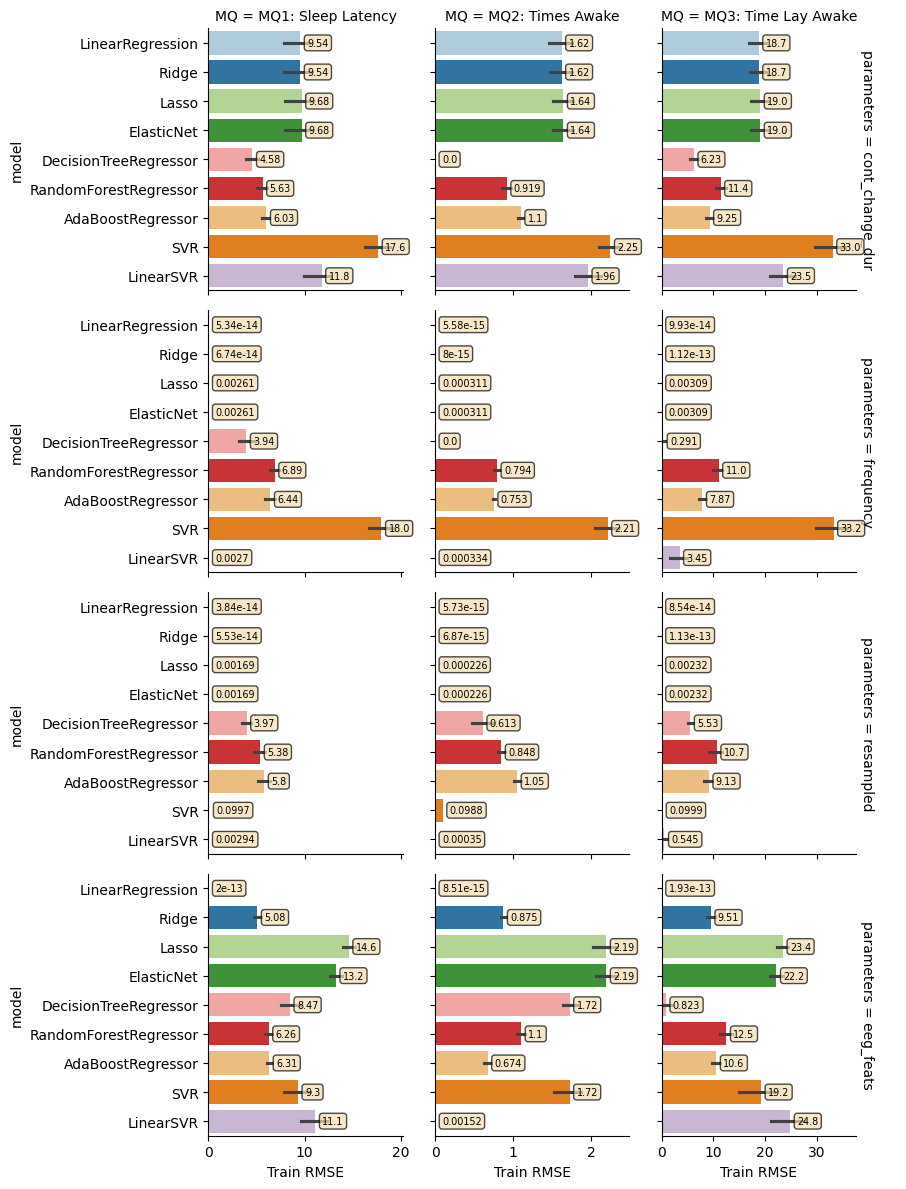

In [536]:
g = sns.FacetGrid(
    data=plotting_reg_CV_scores,
    col="MQ",
    row="parameters",
    sharey=True,
    sharex="col",
    margin_titles=True,
)
g.map_dataframe(
    sns.barplot,
    x="Train RMSE",
    y="model",
    palette=sns.color_palette("Paired", 9),
    legend=False,
    hue="model",
    hue_order=[
        "LinearRegression",
        "Ridge",
        "Lasso",
        "ElasticNet",
        "DecisionTreeRegressor",
        "RandomForestRegressor",
        "AdaBoostRegressor",
        "SVR",
        "LinearSVR",
    ],
)
for ax in g.axes.flatten():
    for i in ax.containers:
        ax.bar_label(
            i,
            fmt="{:.3}",
            label_type="edge",
            bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.7),
            padding=5,
            fontsize="x-small",
        )
g.add_legend()
plt.savefig("../figures/best_models_across_MQ1-3_train_RMSE.png", dpi=400)

# 0.4 / 0.5 Load SS and EEG Pipelines

In [295]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold

# from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import make_column_transformer

from sklearn.ensemble import VotingClassifier
from sleep_eeg.pre_processing.sleep_cycles import assemble_data
from sleep_eeg.pre_processing.mq import compute_class_weights

ss_old_assembled_data, ss_old_predictor_groups = assemble_data(
    drop_mq_grp_par_nig_dru=False, mq_class_percentiles=[0.25, 0.5, 0.75]
)
ss_new_data = ss_old_assembled_data
ss_new_data = ss_new_data[ss_new_data["total_sleep_time"] >= 700]

ss_mq = ss_new_data[ss_old_predictor_groups["mq"]]
ss_new_data.drop(labels=ss_old_predictor_groups["mq"], axis=1, inplace=True)
ss_mq_class_weights = compute_class_weights(ss_mq).to_dict()
ss_ohe_cols = ["Sex (1=m, 2=f)"]
ss_ohe_encoder = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), ss_ohe_cols),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
ss_ohe_encoder.set_output(transform="pandas")
ss_scaler = StandardScaler()
ss_scaler.set_output(transform="pandas")
ss_constant_remover = VarianceThreshold(threshold=0.0)
ss_constant_remover.set_output(transform="pandas")
ss_preprocess_pipe = Pipeline(
    [
        ("One Hot Encoder", ss_ohe_encoder),
        ("Constant Remover", ss_constant_remover),
        ("Scaler", ss_scaler),
    ]
)

from sklearn.base import BaseEstimator, TransformerMixin


# Custom transformer to select features from each dataset
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        return X[X.columns.intersection(self.columns)]


frequency_selector = ColumnSelector(
    columns=ss_old_predictor_groups["psd"]
    + ss_old_predictor_groups["fourrier"]
    + ss_old_predictor_groups["age_bmi"]
)
resampled_selector = ColumnSelector(
    columns=ss_old_predictor_groups["resampled_times_series"]
    + ss_old_predictor_groups["age_bmi"]
)
cont_change_dur_selector = ColumnSelector(
    columns=ss_old_predictor_groups["continuity"]
    + ss_old_predictor_groups["changements"]
    + ss_old_predictor_groups["durations_latencies"]
    + ss_old_predictor_groups["age_bmi"]
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_20523/2883560422.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_new_data.drop(labels=ss_old_predictor_groups["mq"], axis=1, inplace=True)
/Users/wesleymonteith/code/ml-project-2-malm/sleep_eeg/pre_processing/mq.py:74: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  - mq_classified[classified_mq_cols].astype(int).apply(pd.value_counts)


In [296]:
from sleep_eeg.utils import rename_nights

eeg_extracted_features_data = pd.read_csv(
    "../data/eeg/df_corrected_110.csv", index_col=0
)
eeg_extracted_features_data.index = rename_nights(eeg_extracted_features_data["NAME"])
eeg_extracted_features_data.drop(["NAME"], axis=1, inplace=True)
eeg_extracted_features_data.dropna(inplace=True)
eeg_old_assembled_data, eeg_old_predictor_groups = assemble_data(
    drop_mq_grp_par_nig_dru=False, mq_class_percentiles=[0.25, 0.5, 0.75]
)
eeg_extracted_features_data.drop(["sex"], axis=1, inplace=True)
from feature_engine.selection import DropCorrelatedFeatures

eeg_tr = DropCorrelatedFeatures(variables=None, method="kendall", threshold=0.9)
eeg_extracted_features_data = eeg_tr.fit_transform(eeg_extracted_features_data)
eeg_new_data = pd.merge(
    eeg_extracted_features_data,
    eeg_old_assembled_data,
    left_index=True,
    right_index=True,
)
eeg_new_data = eeg_new_data[eeg_new_data["total_sleep_time"] >= 700]
eeg_new_data.drop(
    eeg_old_predictor_groups["psd"]
    + eeg_old_predictor_groups["resampled_times_series"]
    + eeg_old_predictor_groups["fourrier"]
    + eeg_old_predictor_groups["continuity"]
    + eeg_old_predictor_groups["changements"]
    + eeg_old_predictor_groups["durations_latencies"],
    axis=1,
    inplace=True,
)
eeg_mq = eeg_new_data[eeg_old_predictor_groups["mq"]]
eeg_new_data.drop(labels=eeg_old_predictor_groups["mq"], axis=1, inplace=True)
eeg_mq_class_weights = compute_class_weights(eeg_mq).to_dict()
eeg_ohe_cols = ["Sex (1=m, 2=f)"]
eeg_standardize_cols = eeg_new_data.columns.difference(eeg_ohe_cols).to_list()

eeg_ohencoder_and_scaler = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="if_binary"), eeg_ohe_cols),
    (StandardScaler(), eeg_standardize_cols),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)
eeg_ohencoder_and_scaler.set_output(transform="pandas")
eeg_constant_remover = VarianceThreshold(threshold=0.0)
eeg_constant_remover.set_output(transform="pandas")
eeg_preprocess_pipe = Pipeline(
    [
        ("ohencoder_and_scaler", eeg_ohencoder_and_scaler),
        ("constant_remover", eeg_constant_remover),
    ]
)

/Users/wesleymonteith/code/ml-project-2-malm/sleep_eeg/pre_processing/mq.py:74: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  - mq_classified[classified_mq_cols].astype(int).apply(pd.value_counts)


((102, 924), (102, 925))

In [ ]:
# Classification Models
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multioutput import MultiOutputClassifier


# Regression Models
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    SGDRegressor,
)
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# 4. Ensembling

## 4.1. With SS data

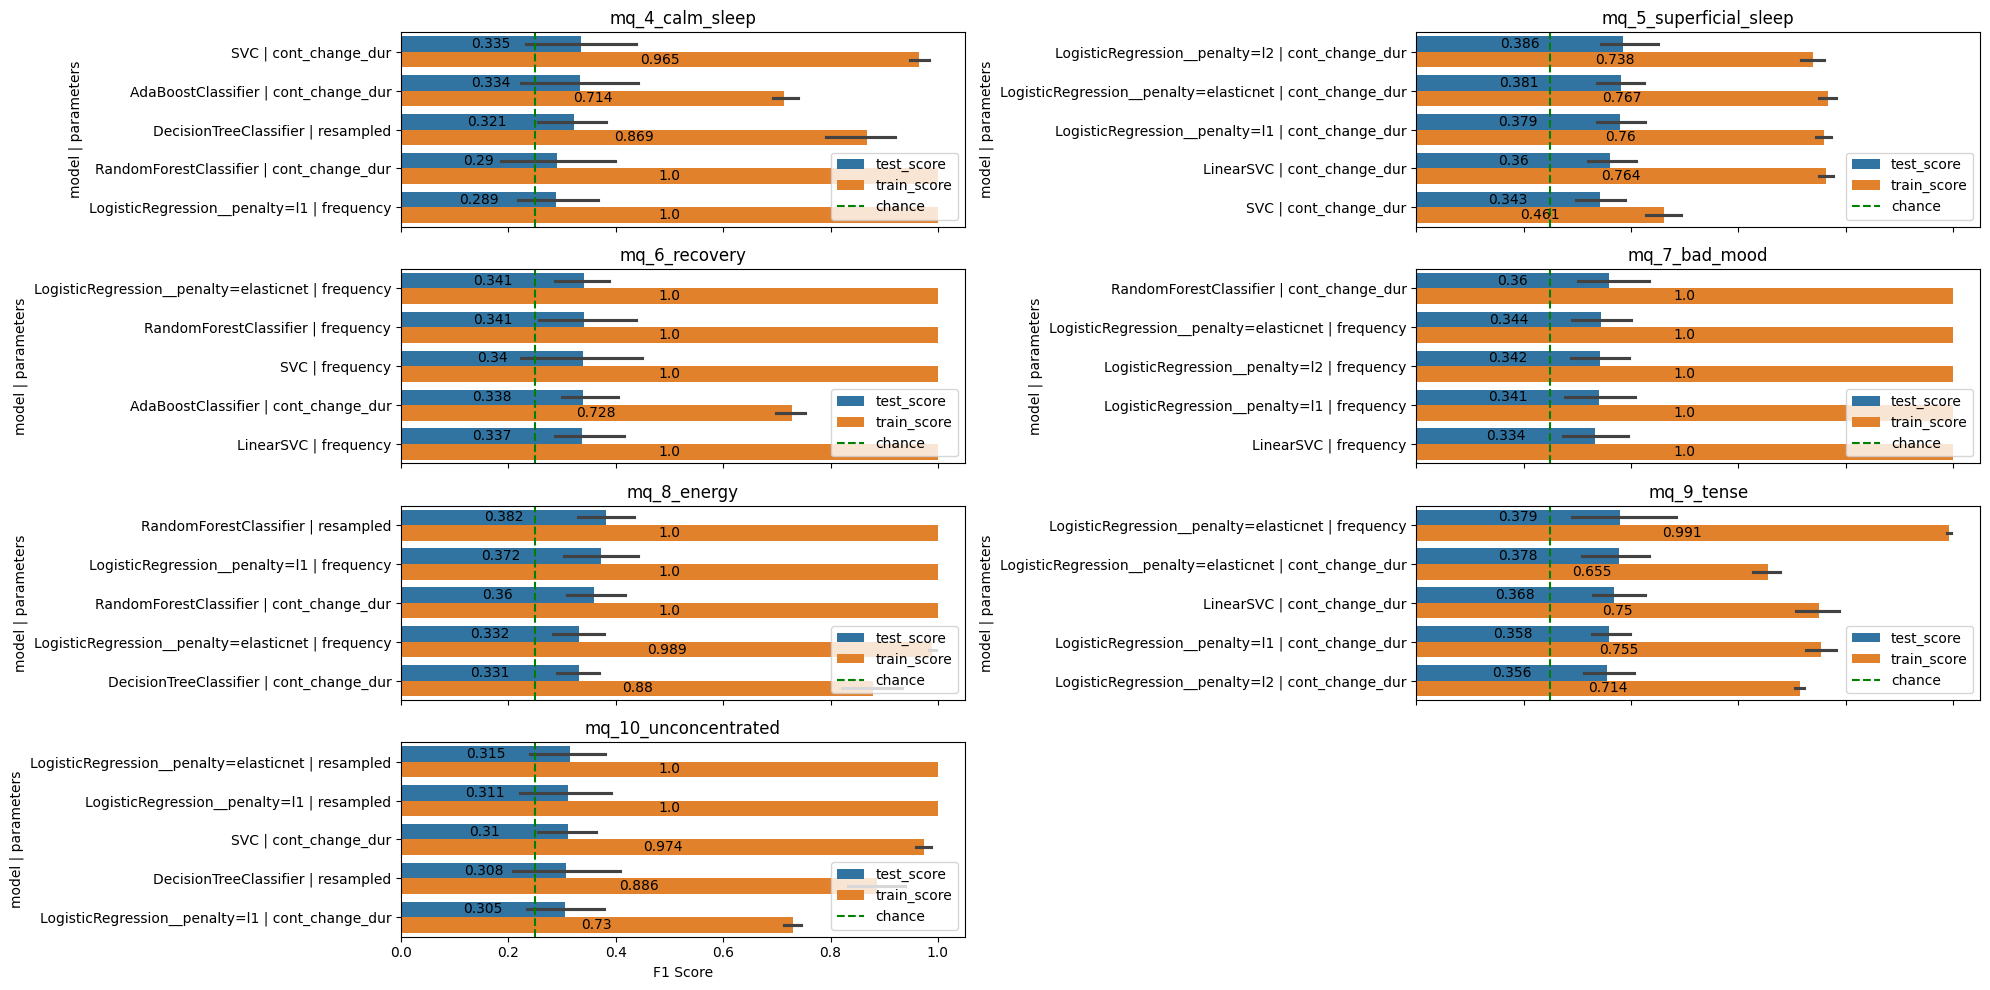

In [92]:
fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(20, 10))
for i, (ax, y_name) in enumerate(
    zip(axes.flatten(), ss_clf_CV_scores["y_name"].unique()), start=1
):
    plot_y_name_top_X_best_model_params_combo(
        ss_clf_CV_scores, y_name, X=5, ax=ax, smaller_is_better=False, chance_level=0.25
    )
    ax.set_title(y_name)
    if i == 6:
        ax.set_xlabel("Yeah")
axes.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()

### 4.1.8. MQ8

In [93]:
ss_clf_hyp_opti_resampled.index = ss_clf_hyp_opti_resampled["model"]
ss_clf_hyp_opti_resampled["hyp_mq_8_energy"]["RandomForestClassifier"]

"[OrderedDict({'model__max_depth': 11, 'model__n_estimators': 219})]"

In [94]:
ss_clf_hyp_opti_frequency.index = ss_clf_hyp_opti_frequency["model"]
ss_clf_hyp_opti_frequency["hyp_mq_8_energy"]["LogisticRegression__penalty=l1"]

"[OrderedDict({'model__C': 3.916449174261764})]"

In [95]:
ss_clf_hyp_opti_cont_change_dur.index = ss_clf_hyp_opti_cont_change_dur["model"]
ss_clf_hyp_opti_cont_change_dur["hyp_mq_8_energy"]["RandomForestClassifier"]

"[OrderedDict({'model__max_depth': 6, 'model__n_estimators': 295})]"

In [102]:
# Create a pipeline for each classifier
first = Pipeline(
    [
        ("selector", resampled_selector),  # Select relevant features
        ("preprocessing", ss_preprocess_pipe),
        (
            "classifier",
            RandomForestClassifier(
                random_state=0,
                class_weight=ss_mq_class_weights["mq_8_energy"],
                **{"max_depth": 11, "n_estimators": 219}
            ),
        ),
    ]
)
second = Pipeline(
    [
        ("selector", frequency_selector),
        ("preprocessing", ss_preprocess_pipe),
        (
            "classifier",
            LogisticRegression(
                penalty="l1",
                solver="liblinear",
                class_weight=ss_mq_class_weights["mq_8_energy"],
                **{"C": 3.916449174261764}
            ),
        ),
    ]
)
third = Pipeline(
    [
        ("selector", cont_change_dur_selector),
        ("preprocessing", ss_preprocess_pipe),
        (
            "classifier",
            RandomForestClassifier(
                random_state=0,
                class_weight=ss_mq_class_weights["mq_8_energy"],
                **{"max_depth": 6, "n_estimators": 295}
            ),
        ),
    ]
)

mq8_ensemble_classifier = VotingClassifier(
    estimators=[
        ("1st best", first),
        ("2nd best", second),
        ("3rd best", third),
    ],
    voting="hard",
)
mq8_ensemble_classifier

VotingClassifier(estimators=[('1st best',
                              Pipeline(steps=[('selector',
                                               ColumnSelector(columns=['resampled_t0',
                                                                       'resampled_t1',
                                                                       'resampled_t2',
                                                                       'resampled_t3',
                                                                       'resampled_t4',
                                                                       'resampled_t5',
                                                                       'resampled_t6',
                                                                       'resampled_t7',
                                                                       'resampled_t8',
                                                                       'resampled_t9',
                                                                       'resampled_t10',
                                                                       'resampled_t11',
                                                                       'resampled_t12',
                                                                       'resampled_t13',
                                                                       'resampled_t14',
                                                                       'resampled_t15',
                                                                       'resampled_t...
                                                                                                 OneHotEncoder(drop='if_binary',
                                                                                                               sparse_output=False),
                                                                                                 ['Sex '
                                                                                                  '(1=m, '
                                                                                                  '2=f)'])],
                                                                                  verbose_feature_names_out=False)),
                                                               ('Constant '
                                                                'Remover',
                                                                VarianceThreshold()),
                                                               ('Scaler',
                                                                StandardScaler())])),
                                              ('classifier',
                                               RandomForestClassifier(class_weight={0: 0.7413793103448276,
                                                                                    1: 0.7672413793103449,
                                                                                    2: 0.75,
                                                                                    3: 0.7413793103448276},
                                                                      max_depth=6,
                                                                      n_estimators=295,
                                                                      random_state=0))]))])

In [110]:
mq9_ens_CV_scores = cross_validate(
    estimator=mq8_ensemble_classifier,
    X=ss_new_data,
    y=ss_mq["mq_8_energy"],
    scoring="f1_weighted",
    return_train_score=True,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
)

In [112]:
mq9_ens_CV_scores

{'fit_time': array([0.77757215, 0.73656297, 0.733886  , 0.73532081, 0.73750305]),
 'score_time': array([0.06250691, 0.06220174, 0.06483197, 0.06249714, 0.06320596]),
 'test_score': array([0.51634615, 0.4462494 , 0.24830918, 0.17987657, 0.35655649]),
 'train_score': array([1., 1., 1., 1., 1.])}

# 5. Feature Importance

In [351]:
eeg_clf_models = [
    LogisticRegression(random_state=0, penalty=None),
    LogisticRegression(random_state=0, penalty="l1", solver="liblinear"),
    LogisticRegression(random_state=0, penalty="l2"),
    LogisticRegression(
        random_state=0, penalty="elasticnet", solver="saga", l1_ratio=0.5
    ),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    SVC(random_state=0),
    LinearSVC(random_state=0),
]

In [352]:
def lasso_ridge_logistic_naming(model):
    if model.__class__.__name__ == "LogisticRegression":
        return f"LogisticRegression__penalty={model.penalty}"
    else:
        return model.__class__.__name__

In [356]:
eeg_clf_model_hp_mapping = {
    lasso_ridge_logistic_naming(model): i for i, model in enumerate(eeg_clf_models)
}
eeg_clf_model_hp_mapping

{'LogisticRegression__penalty=None': 0,
 'LogisticRegression__penalty=l1': 1,
 'LogisticRegression__penalty=l2': 2,
 'LogisticRegression__penalty=elasticnet': 3,
 'DecisionTreeClassifier': 4,
 'RandomForestClassifier': 5,
 'AdaBoostClassifier': 6,
 'SVC': 7,
 'LinearSVC': 8}

In [359]:
mqs_where_eeg_best = [
    "mq_4_calm_sleep",
    "mq_6_recovery",
    "mq_7_bad_mood",
    "mq_8_energy",
    "mq_9_tense",
    "mq_10_unconcentrated",
]
mqs_models_where_eeg_best = [
    RandomForestClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    LogisticRegression(random_state=0, penalty="l1", solver="liblinear"),
    LogisticRegression(random_state=0, penalty="l1", solver="liblinear"),
    AdaBoostClassifier(random_state=0),
    LogisticRegression(
        random_state=0, penalty="elasticnet", solver="saga", l1_ratio=0.5
    ),
]

In [456]:
ss_reg_hyp_opti_cont_change_dur["hyp_mq_1_Sleeplatency"]["AdaBoostRegressor"]

"[OrderedDict({'model__learning_rate': 0.039164491742617644, 'model__n_estimators': 219})]"

In [457]:
ss_reg_hyp_opti_resampled["hyp_mq_2_times_awake"]["RandomForestRegressor"]

"[OrderedDict({'model__max_depth': 6, 'model__n_estimators': 295})]"

In [458]:
ss_reg_hyp_opti_resampled["hyp_mq_3_time_lay_awake"]["RandomForestRegressor"]

"[OrderedDict({'model__max_depth': 6, 'model__n_estimators': 295})]"

In [461]:
ss_clf_hyp_opti_cont_change_dur["hyp_mq_5_superficial_sleep"][
    "LogisticRegression__penalty=l2"
]

"[OrderedDict({'model__C': 0.5958198748137256})]"

In [489]:
from copy import deepcopy

fi_dict_mq1_10 = {}

for mq_name, model in zip(mqs_where_eeg_best, mqs_models_where_eeg_best):
    mq_pipe = deepcopy(eeg_preprocess_pipe)
    mq_pipe.steps.append(("model", model))
    best_params = eeg_clf_best_params_clf_corr9_full[mq_name][
        eeg_clf_model_hp_mapping[lasso_ridge_logistic_naming(model)]
    ]
    if hasattr(mq_pipe.named_steps.model, "class_weight"):
        best_params.update(dict(model__class_weight=eeg_mq_class_weights[mq_name]))

    mq_pipe.set_params(**best_params)
    mq_pipe.fit(eeg_new_data, eeg_mq[mq_name])

    fi_dict_mq1_10[mq_name] = {
        "model_name": lasso_ridge_logistic_naming(model),
        "feature_names_in": mq_pipe.named_steps.model.feature_names_in_,
        "parameters": "EEG Features",
    }

    if hasattr(mq_pipe.named_steps.model, "feature_importances_"):
        fi_dict_mq1_10[mq_name][
            "feature_importances"
        ] = mq_pipe.named_steps.model.feature_importances_
    elif hasattr(mq_pipe.named_steps.model, "coef_"):
        fi_dict_mq1_10[mq_name]["coef"] = mq_pipe.named_steps.model.coef_
        fi_dict_mq1_10[mq_name]["classes"] = mq_pipe.named_steps.model.classes_


mq1_pipe = Pipeline(
    [
        ("selector", cont_change_dur_selector),  # Select relevant features
        ("preprocessing", ss_preprocess_pipe),
        (
            "model",
            AdaBoostRegressor(
                random_state=0,
                **{"learning_rate": 0.039164491742617644, "n_estimators": 219}
            ),
        ),
    ]
)
mq2_pipe = Pipeline(
    [
        ("selector", resampled_selector),  # Select relevant features
        ("preprocessing", ss_preprocess_pipe),
        (
            "model",
            RandomForestRegressor(
                random_state=0, **{"max_depth": 6, "n_estimators": 295}
            ),
        ),
    ]
)
mq3_pipe = Pipeline(
    [
        ("selector", resampled_selector),  # Select relevant features
        ("preprocessing", ss_preprocess_pipe),
        (
            "model",
            RandomForestRegressor(
                random_state=0, **{"max_depth": 6, "n_estimators": 295}
            ),
        ),
    ]
)
mq5_pipe = Pipeline(
    [
        ("selector", cont_change_dur_selector),  # Select relevant features
        ("preprocessing", ss_preprocess_pipe),
        (
            "model",
            LogisticRegression(
                random_state=0,
                class_weight=ss_mq_class_weights["mq_5_superficial_sleep"],
                **{"C": 0.5958198748137256}
            ),
        ),
    ]
)
for mq_pipe, mq_name, feature_names in zip(
    [mq1_pipe, mq2_pipe, mq3_pipe, mq5_pipe],
    [
        "mq_1_Sleeplatency",
        "mq_2_times_awake",
        "mq_3_time_lay_awake",
        "mq_5_superficial_sleep",
    ],
    [
        "Continuity, change & duration",
        "Resampled sleep stages",
        "Resampled sleep stages",
        "Continuity, change & duration",
    ],
):
    mq_pipe.fit(ss_new_data, ss_mq[mq_name])
    fi_dict_mq1_10[mq_name] = {
        "model_name": lasso_ridge_logistic_naming(mq_pipe.named_steps.model),
        "feature_names_in": mq_pipe.named_steps.model.feature_names_in_,
        "parameters": feature_names,
    }

    if hasattr(mq_pipe.named_steps.model, "feature_importances_"):
        fi_dict_mq1_10[mq_name][
            "feature_importances"
        ] = mq_pipe.named_steps.model.feature_importances_
    elif hasattr(mq_pipe.named_steps.model, "coef_"):
        fi_dict_mq1_10[mq_name]["coef"] = mq_pipe.named_steps.model.coef_
        fi_dict_mq1_10[mq_name]["classes"] = mq_pipe.named_steps.model.classes_

/Users/wesleymonteith/miniconda3/envs/malm/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [490]:
for val in fi_dict_mq1_10.values():
    print(val["model_name"])

RandomForestClassifier
RandomForestClassifier
LogisticRegression__penalty=l1
LogisticRegression__penalty=l1
AdaBoostClassifier
LogisticRegression__penalty=elasticnet
AdaBoostRegressor
RandomForestRegressor
RandomForestRegressor
LogisticRegression__penalty=l2


In [491]:
lin_model_names = [
    "LogisticRegression__penalty=l1",
    "LogisticRegression__penalty=elasticnet",
    "LogisticRegression__penalty=l2",
]

tree_model_names = [
    "RandomForestClassifier",
    "AdaBoostClassifier",
    "AdaBoostRegressor",
    "RandomForestRegressor",
]

In [600]:
def plot_tree_fi(
    fi_dict,
    mq_name,
    features_to_plot,
    rf=True,
    ax=None,
    title=None,
    color_palette="rocket_r",
):
    if ax is None:
        fig, ax = plt.subplots()
    importances = pd.Series(
        fi_dict[mq_name]["feature_importances"],
        index=fi_dict[mq_name]["feature_names_in"],
    )
    importances.sort_values(ascending=False)[:features_to_plot].plot.bar(
        ax=ax, color=sns.color_palette(color_palette, features_to_plot)
    )
    ax.set_title(title)
    ax.set_ylabel("Mean decrease in impurity")
    return ax


plot_tree_fi(fi_dict_mq1_10, "mq_4_calm_sleep", 10)

<Axes: ylabel='Mean decrease in impurity'>

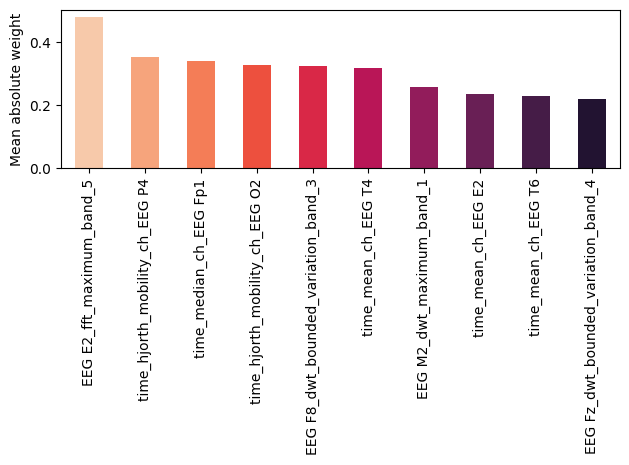

In [497]:
def plot_lin_fi(
    fi_dict, mq_name, features_to_plot, ax=None, title=None, color_palette="rocket_r"
):
    if ax is None:
        fig, ax = plt.subplots()
    color = sns.color_palette(color_palette, features_to_plot)
    importances = pd.Series(
        np.mean(np.abs(fi_dict[mq_name]["coef"]), axis=0),
        index=fi_dict[mq_name]["feature_names_in"],
    )
    # std = np.std(np.abs(fi_dict[mq_name]["coef"]), axis=0)
    importances.sort_values(ascending=False)[:features_to_plot].plot.bar(
        ax=ax, color=color
    )  # , yerr=std)
    ax.set_title(title)
    ax.set_ylabel("Mean absolute weight")


fig, ax = plt.subplots()
plot_lin_fi(fi_dict_mq1_10, "mq_7_bad_mood", 10, ax=ax)
fig.tight_layout()
plt.show()

In [498]:
mq_title_mapping = deepcopy(reg_mq_title_mapping)
mq_title_mapping.update(clf_mq_title_mapping)
mq_title_mapping

{'mq_1_Sleeplatency': 'MQ1: Sleep Latency',
 'mq_2_times_awake': 'MQ2: Times Awake',
 'mq_3_time_lay_awake': 'MQ3: Time Lay Awake',
 'mq_4_calm_sleep': 'MQ4: Calm Sleep',
 'mq_5_superficial_sleep': 'MQ5: Superficial Sleep',
 'mq_6_recovery': 'MQ6: Recovery',
 'mq_7_bad_mood': 'MQ7: Bad Mood',
 'mq_8_energy': 'MQ8: Energy',
 'mq_9_tense': 'MQ9: Tense',
 'mq_10_unconcentrated': 'MQ10: Unconcentrated'}

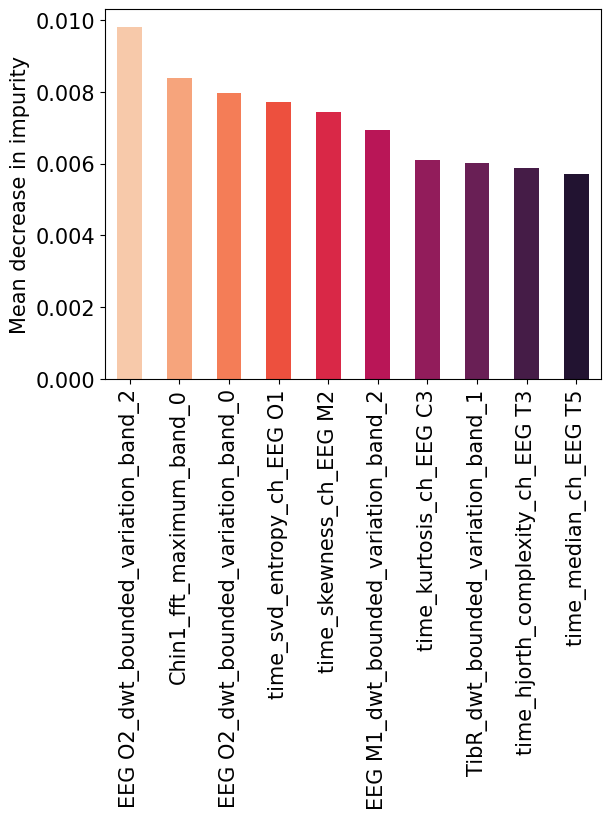

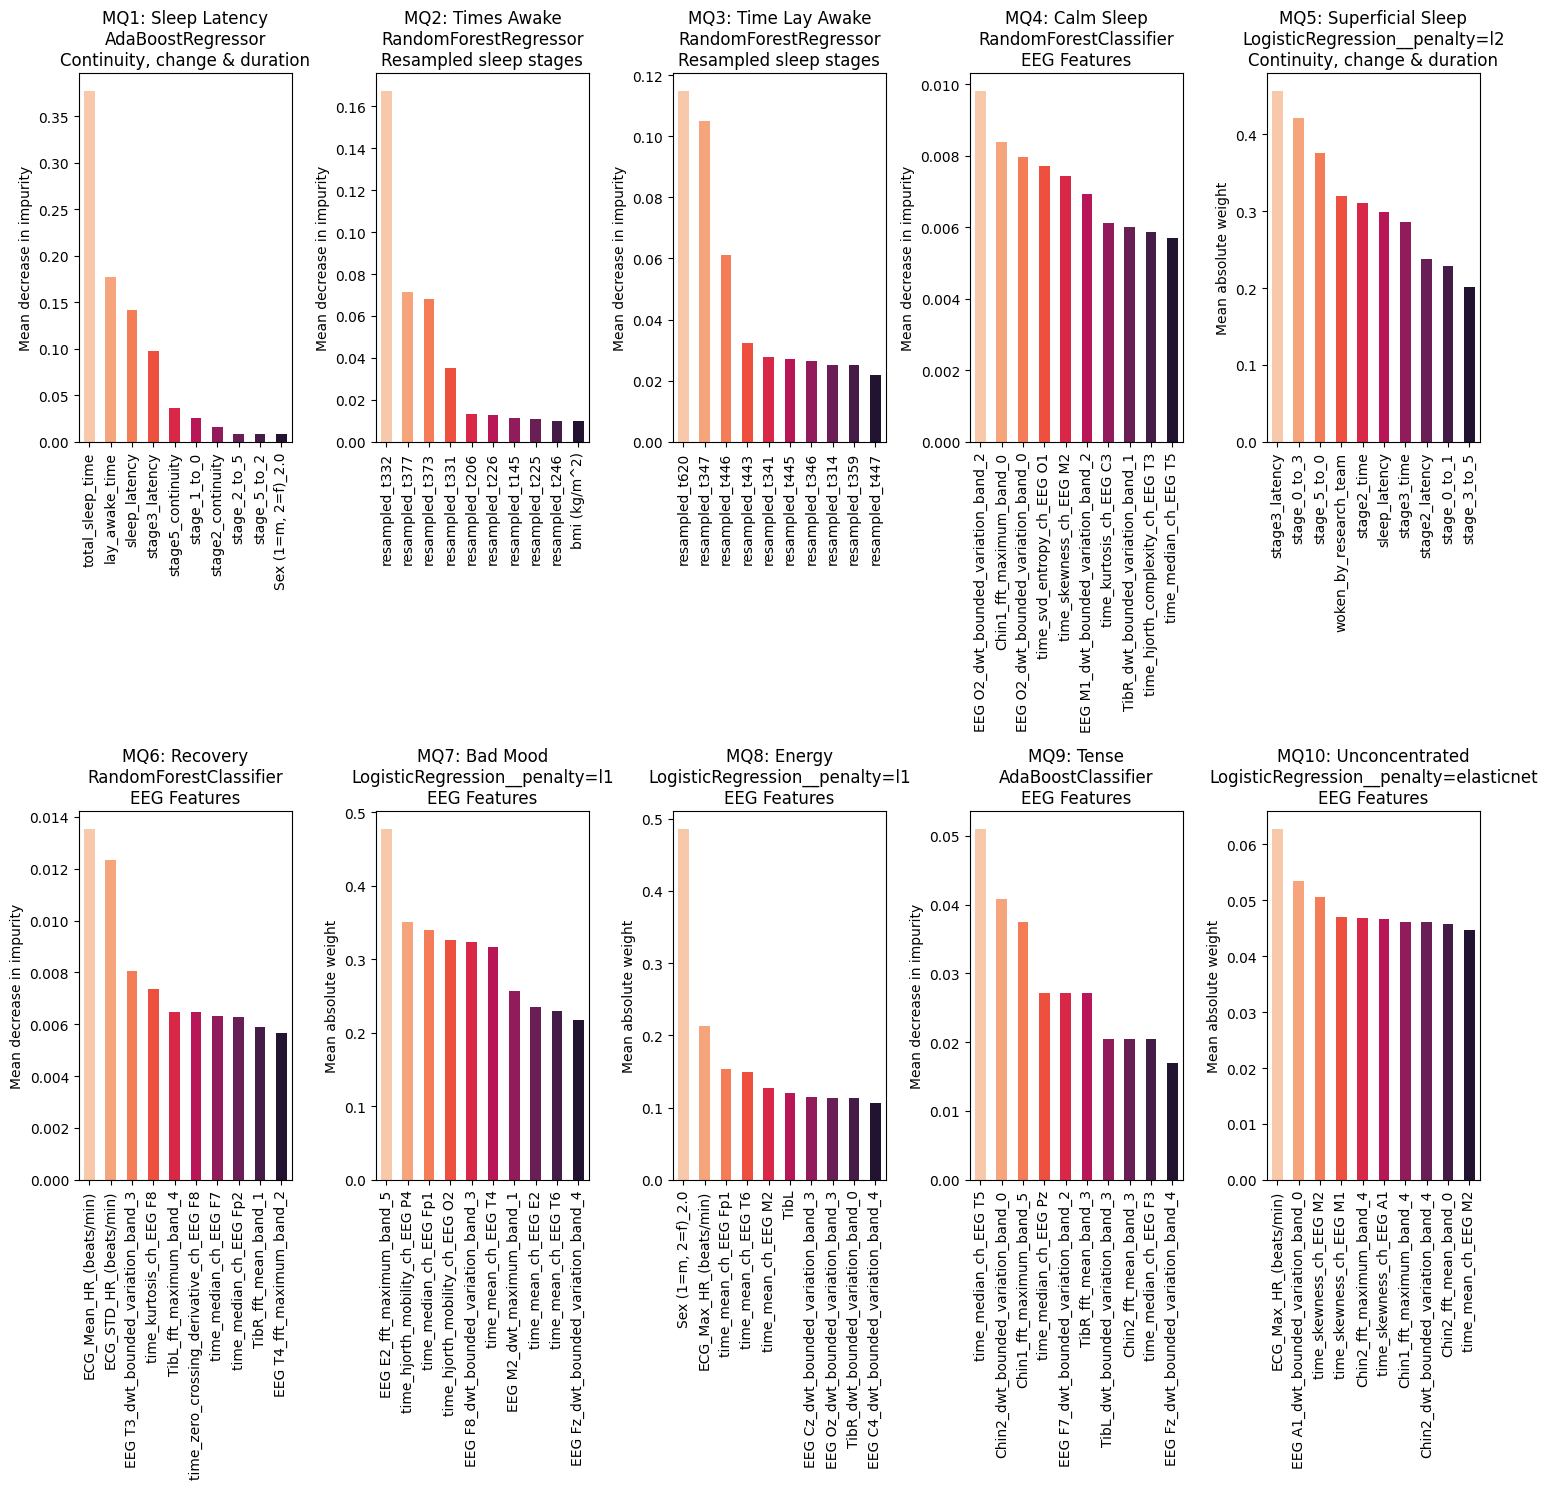

In [601]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(15, 15))
features_to_plot = 10
color_palette = "rocket_r"
for ax, mq_name in zip(axes.flatten(), mq_title_mapping.keys()):
    model_name = fi_dict_mq1_10[mq_name]["model_name"]
    title = f"{mq_title_mapping[mq_name]}\n{model_name}\n{fi_dict_mq1_10[mq_name]['parameters']}"
    if model_name in lin_model_names:
        plot_lin_fi(
            fi_dict_mq1_10,
            mq_name,
            features_to_plot,
            ax=ax,
            title=title,
            color_palette=color_palette,
        )
    elif model_name in tree_model_names:
        plot_tree_fi(
            fi_dict_mq1_10,
            mq_name,
            features_to_plot,
            rf="RandomForest" in model_name,
            ax=ax,
            title=title,
            color_palette=color_palette,
        )
    # ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")
plt.tight_layout()
plt.savefig(
    "../figures/top_10_feature_importances_MQ1-10", dpi=400, bbox_inches="tight"
)
plt.show()

In [510]:
def plot_lin_fi_per_class(
    fi_dict, mq_name, features_to_plot, suptitle=None, savename=None, show=False
):
    fig, axes = plt.subplots(
        ncols=4, nrows=1, figsize=(8, 5), sharex=False, sharey=True
    )
    for i, ax in enumerate(axes.flatten()):
        color = sns.color_palette("rocket_r", features_to_plot)
        importances = pd.Series(
            fi_dict[mq_name]["coef"][i], index=fi_dict[mq_name]["feature_names_in"]
        )

        importances_abs_sorted = importances.abs().sort_values(ascending=False)[
            :features_to_plot
        ]

        importances.loc[importances_abs_sorted.index].sort_values(
            ascending=False
        ).plot.bar(ax=ax, color=color)
        ax.set_title(f"Class {fi_dict[mq_name]['classes'][i]}")
        ax.set_ylabel("weight")
        if i < 2:
            ax.tick_params(
                axis="x",  # changes apply to the x-axis
                which="both",  # both major and minor ticks are affected
                bottom=True,  # ticks along the bottom edge are off
                top=False,  # ticks along the top edge are off
                labelbottom=True,
            )
        else:
            ax.set_xticklabels(
                importances.loc[importances_abs_sorted.index]
                .sort_values(ascending=False)
                .index,
                rotation=90,
            )
    fig.suptitle(suptitle)
    fig.tight_layout()
    if savename is not None:
        plt.savefig(savename, bbox_inches="tight", dpi=400)
    if show:
        plt.show()

In [511]:
fi_dict_mq1_10.keys()

dict_keys(['mq_4_calm_sleep', 'mq_6_recovery', 'mq_7_bad_mood', 'mq_8_energy', 'mq_9_tense', 'mq_10_unconcentrated', 'mq_1_Sleeplatency', 'mq_2_times_awake', 'mq_3_time_lay_awake', 'mq_5_superficial_sleep'])

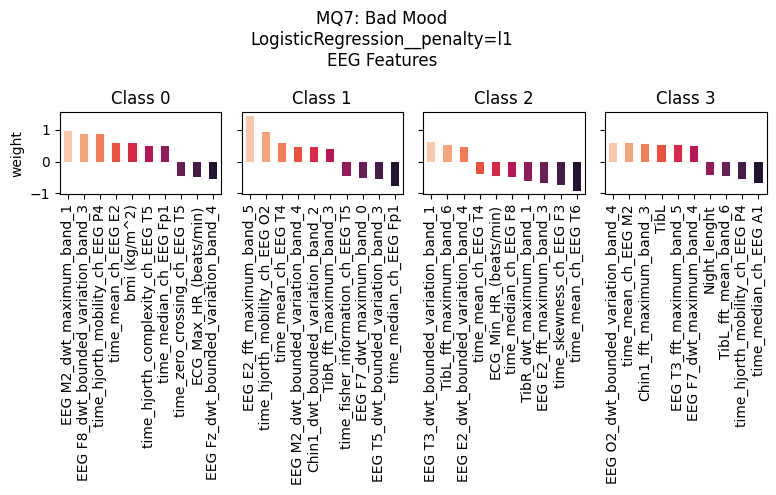

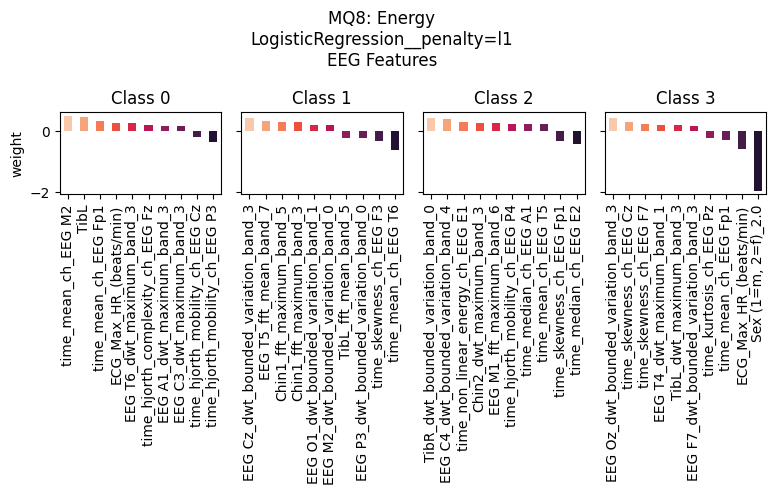

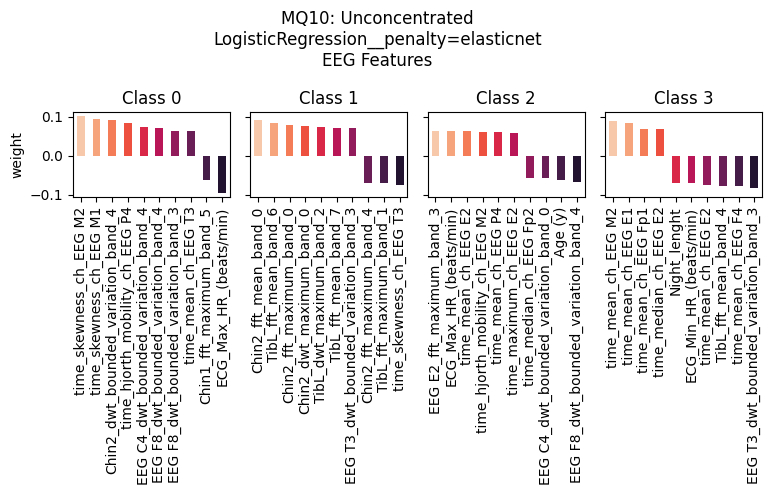

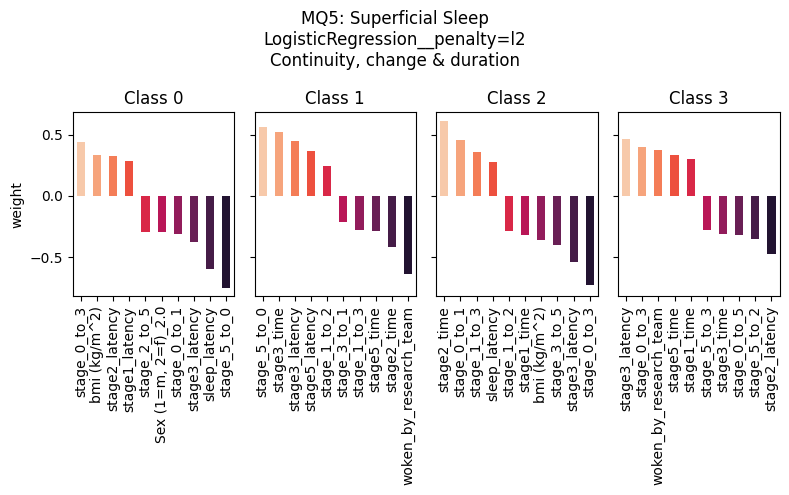

In [512]:
for mq_name in [
    "mq_7_bad_mood",
    "mq_8_energy",
    "mq_10_unconcentrated",
    "mq_5_superficial_sleep",
]:
    model_name = fi_dict_mq1_10[mq_name]["model_name"]
    title = f"{mq_title_mapping[mq_name]}\n{model_name}\n{fi_dict_mq1_10[mq_name]['parameters']}"
    plot_lin_fi_per_class(
        fi_dict=fi_dict_mq1_10,
        mq_name=mq_name,
        features_to_plot=10,
        suptitle=title,
        savename=f"../figures/top_10_feature_importances_per_class_{mq_name}.png",
    )